# DATASET 2 - SOLAR POWER GENERATION DATA

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle



In [100]:
plant_1_generation_path = r"C:\Users\Acer\Documents\Icloud\iCloudDrive\Documents\GitHub\spbu_ml_2025\data\solar_power\Plant_1_Generation_Data.csv"
plant_2_generation_path = r"C:\Users\Acer\Documents\Icloud\iCloudDrive\Documents\GitHub\spbu_ml_2025\data\solar_power\Plant_2_Generation_Data.csv"
plant_1_weather_sensor_path = r"C:\Users\Acer\Documents\Icloud\iCloudDrive\Documents\GitHub\spbu_ml_2025\data\solar_power\Plant_1_Weather_Sensor_Data.csv"
plant_2_weather_sensor_path = r"C:\Users\Acer\Documents\Icloud\iCloudDrive\Documents\GitHub\spbu_ml_2025\data\solar_power\Plant_2_Weather_Sensor_Data.csv"

In [101]:
plant_1_generation = pd.read_csv(plant_1_generation_path)
plant_2_generation = pd.read_csv(plant_2_generation_path)
plant_1_weather_sensor = pd.read_csv(plant_1_weather_sensor_path)
plant_2_weather_sensor = pd.read_csv(plant_2_weather_sensor_path)

# 1.Проанализировать данные, которые вам попались. Какие выводы можно сделать только из анализа? Проведите визуальный и статический анализ, опишите ваши находки.

In [102]:
plant_1_generation.sample(5)

DATE_TIME  PLANT_ID       SOURCE_KEY     DC_POWER    AC_POWER  \
12868  21-05-2020 20:45   4135001  iCRJl6heRkivqQ3     0.000000    0.000000   
67491  17-06-2020 09:15   4135001  bvBOhCH3iADSZry  4988.375000  489.062500   
67841  17-06-2020 13:15   4135001  ZoEaEvLYb1n2sOq  8219.857143  804.442857   
3971   17-05-2020 00:45   4135001  uHbuxQJl8lW7ozc     0.000000    0.000000   
55300  11-06-2020 14:15   4135001  ZnxXDlPa8U1GXgE  9807.000000  958.612500   

       DAILY_YIELD  TOTAL_YIELD  
12868  7837.000000  7227442.000  
67491   762.750000  6534311.750  
67841  4034.714286  7339916.714  
3971      0.000000  7051339.000  
55300  3902.750000  6728112.750

In [103]:
plant_2_generation.sample(5)

DATE_TIME  PLANT_ID       SOURCE_KEY    DC_POWER    AC_POWER  \
48337  2020-06-08 19:45:00   4136001  xoJJ8DcxJEcupym    0.000000    0.000000   
59181  2020-06-13 23:00:00   4136001  vOuJvMaM2sgwLmb    0.000000    0.000000   
62807  2020-06-15 16:15:00   4136001  oZ35aAeoifZaQzV  401.813333  394.766667   
54306  2020-06-11 15:45:00   4136001  LlT2YUhhzqhg5Sw  430.521429  422.635714   
59291  2020-06-14 00:15:00   4136001  vOuJvMaM2sgwLmb    0.000000    0.000000   

       DAILY_YIELD   TOTAL_YIELD  
48337  9070.000000  2.092858e+08  
59181  6375.000000  2.404098e+06  
62807  2257.133333  1.660178e+09  
54306  3459.500000  2.827580e+08  
59291  6375.000000  2.404098e+06

About this file

Solar power generation data for one plant gathered at 15 minutes intervals over a 34 days period.


DATE_TIME
Date and time for each observation. Observations recorded at 15 minute intervals.


PLANT_ID
Plant ID - this will be common for the entire file.


SOURCE_KEY
Source key in this file stands for the inverter id.


DC_POWER
Amount of DC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.


AC_POWER
Amount of AC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.


DAILY_YIELD
Daily yield is a cumulative sum of power generated on that day, till that point in time.


TOTAL_YIELD
This is the total yield for the inverter till that point in time.

In [104]:
plant_1_weather_sensor.sample(3)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
2243  2020-06-08 05:15:00   4135001  HmiyD2TTLFNqkNe            21.578221   
2359  2020-06-09 10:15:00   4135001  HmiyD2TTLFNqkNe            27.778367   
657   2020-05-22 10:45:00   4135001  HmiyD2TTLFNqkNe            28.069488   

      MODULE_TEMPERATURE  IRRADIATION  
2243           20.218532     0.000000  
2359           44.302362     0.767388  
657            42.748394     0.709147

In [105]:
plant_2_weather_sensor.sample(3)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
424   2020-05-19 10:15:00   4136001  iq8k7ZNt4Mwm3w0            28.937066   
2808  2020-06-13 07:15:00   4136001  iq8k7ZNt4Mwm3w0            23.963179   
1968  2020-06-04 13:15:00   4136001  iq8k7ZNt4Mwm3w0            32.733781   

      MODULE_TEMPERATURE  IRRADIATION  
424            41.523643     0.775781  
2808           26.806507     0.130006  
1968           55.400899     0.942780

About this file

Weather sensor data gathered for one solar plant every 15 minutes over a 34 days period.


DATE_TIME
Date and time for each observation. Observations recorded at 15 minute intervals.


PLANT_ID
Plant ID - this will be common for the entire file.


SOURCE_KEY
Stands for the sensor panel id. This will be common for the entire file because there's only one sensor panel for the plant.


AMBIENT_TEMPERATURE
This is the ambient temperature at the plant.


MODULE_TEMPERATURE
There's a module (solar panel) attached to the sensor panel. This is the temperature reading for that module.


IRRADIATION
Amount of irradiation for the 15 minute interval.

In [106]:
plant_1_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [107]:
plant_1_weather_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [108]:
plant_1_generation["source"] = "Plant 1" #red
plant_2_generation["source"] = "Plant 2" #blue
plant_1_weather_sensor["source"] = "Plant 1" #red
plant_2_weather_sensor["source"] = "Plant 2" #blue
combined_data_gen = pd.concat([plant_1_generation, plant_2_generation])
combined_data_sen = pd.concat([plant_1_weather_sensor, plant_2_weather_sensor])


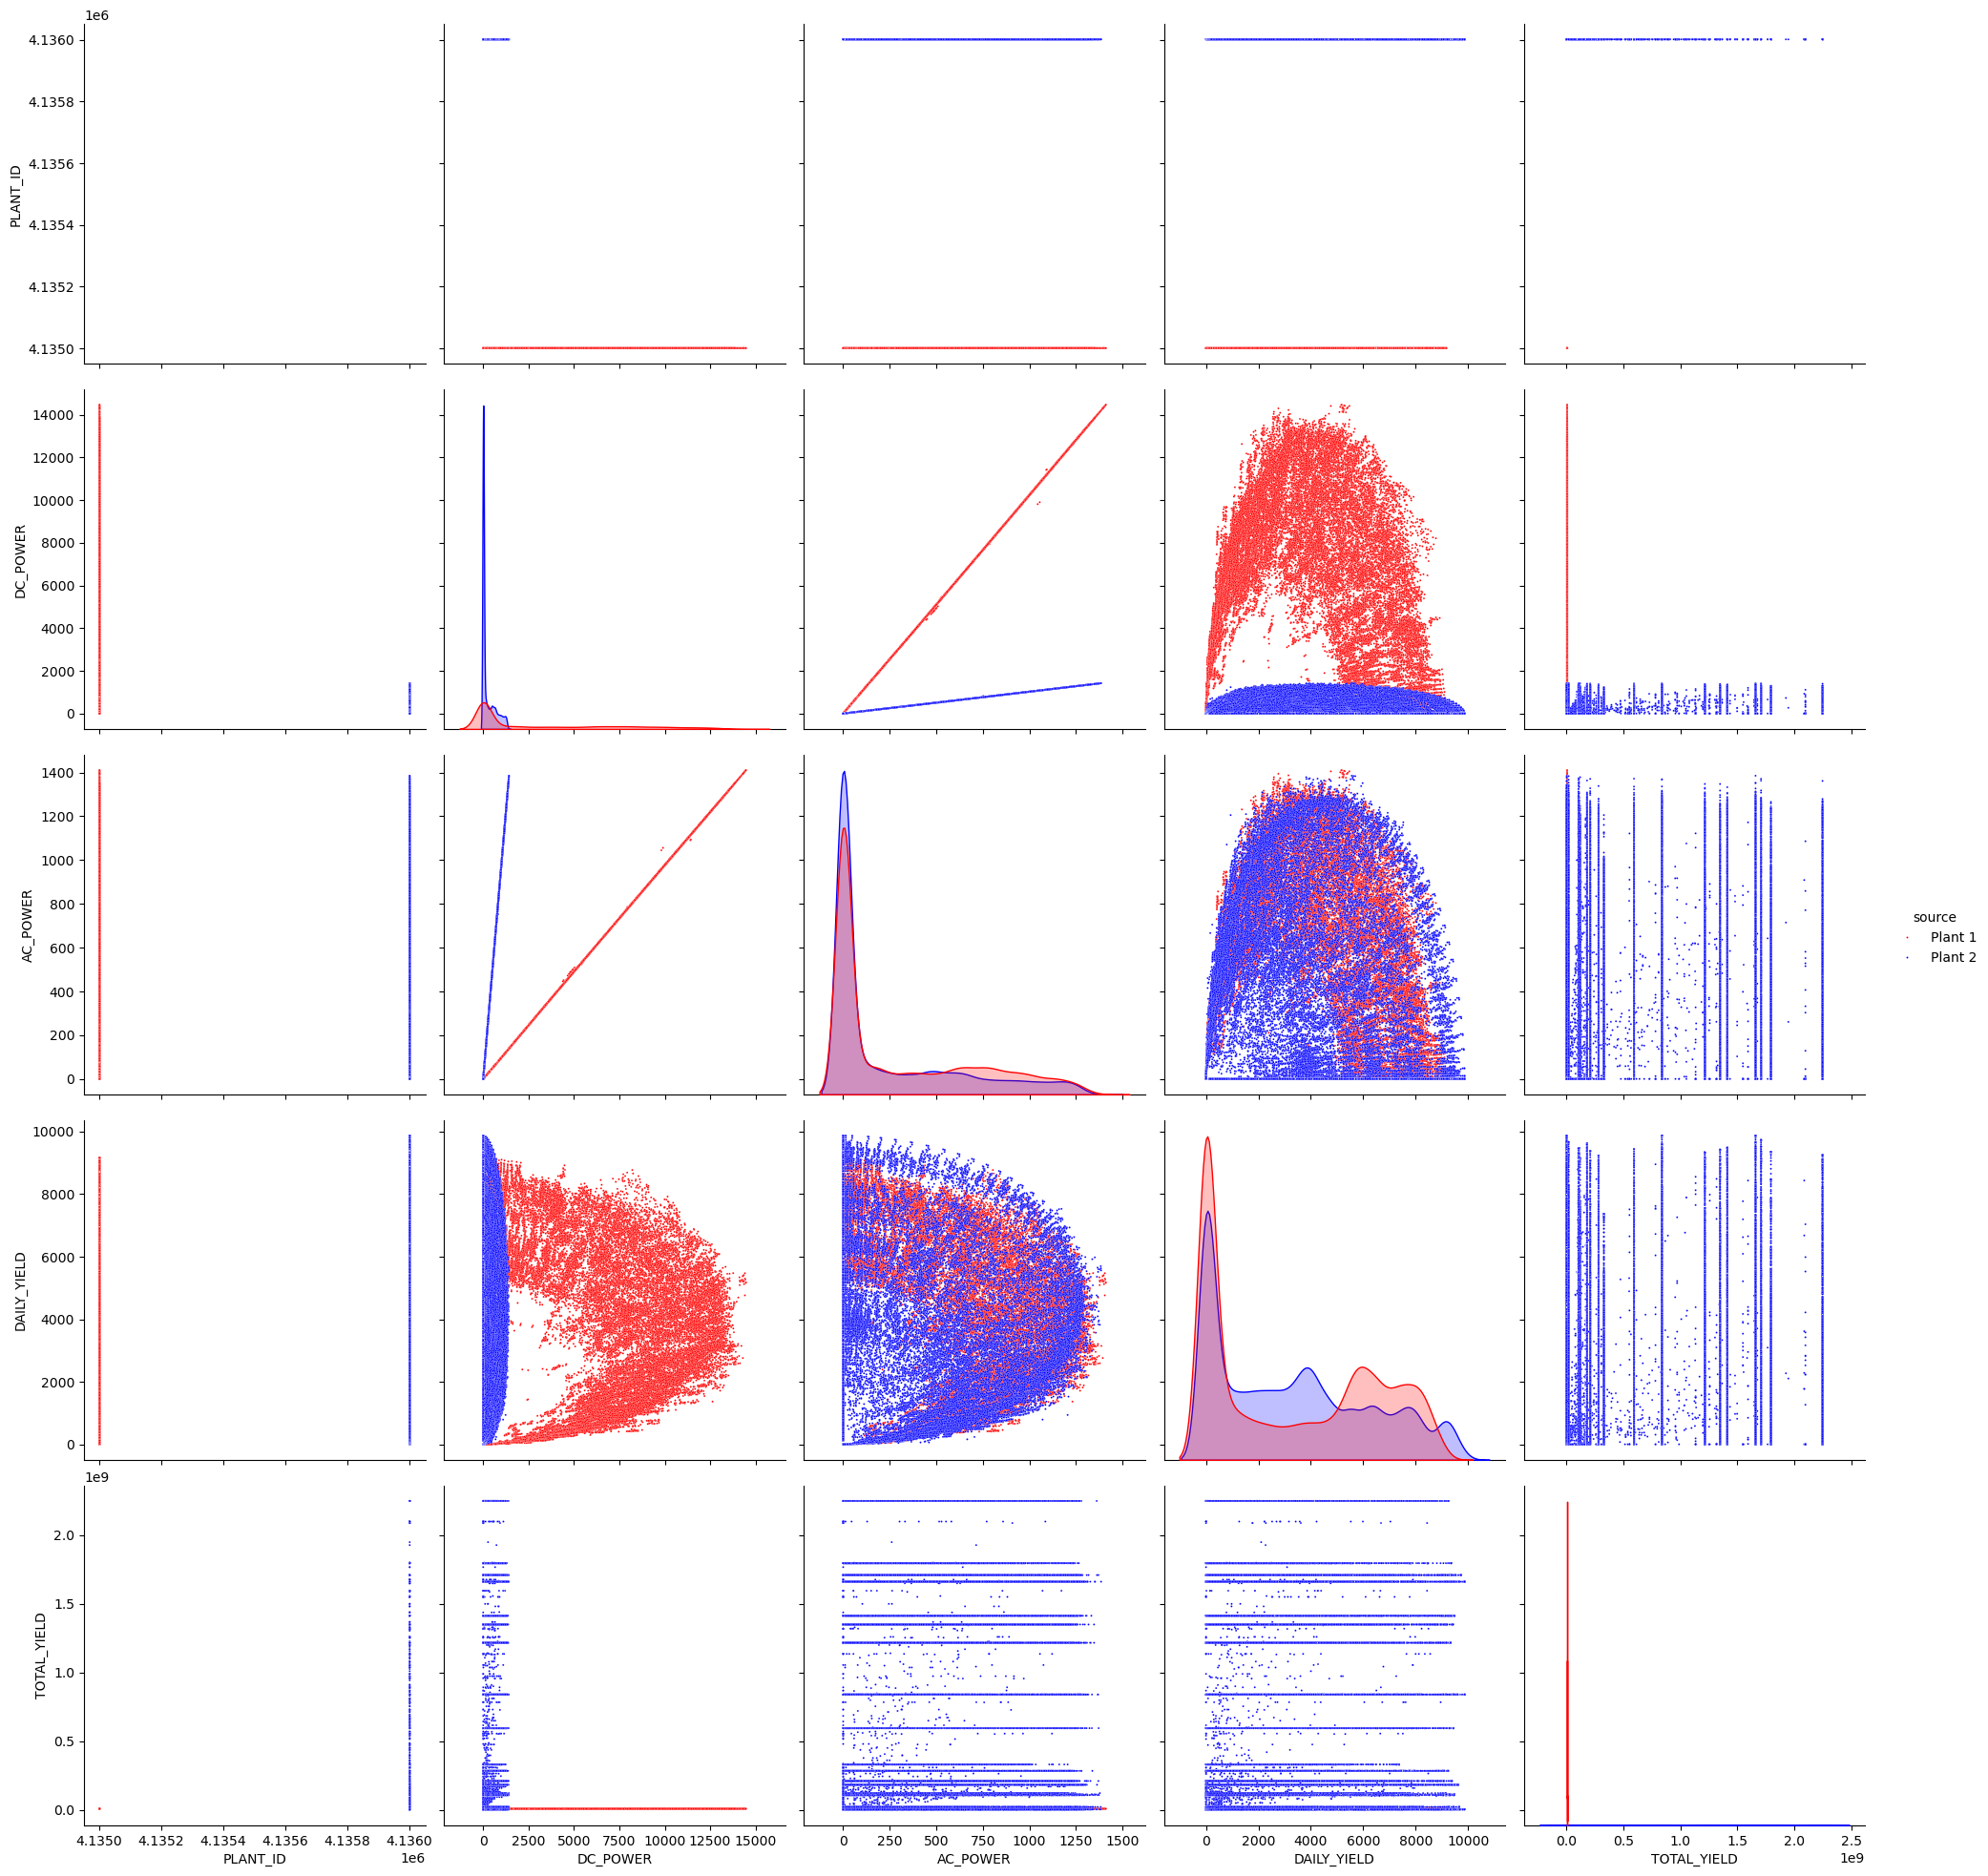

In [109]:
# Строим pairplot с разными цветами для источников
sns.pairplot(combined_data_gen, height=4, hue="source", palette={"Plant 1": "red", "Plant 2": "blue"}, plot_kws={'s': 2})

plt.show()

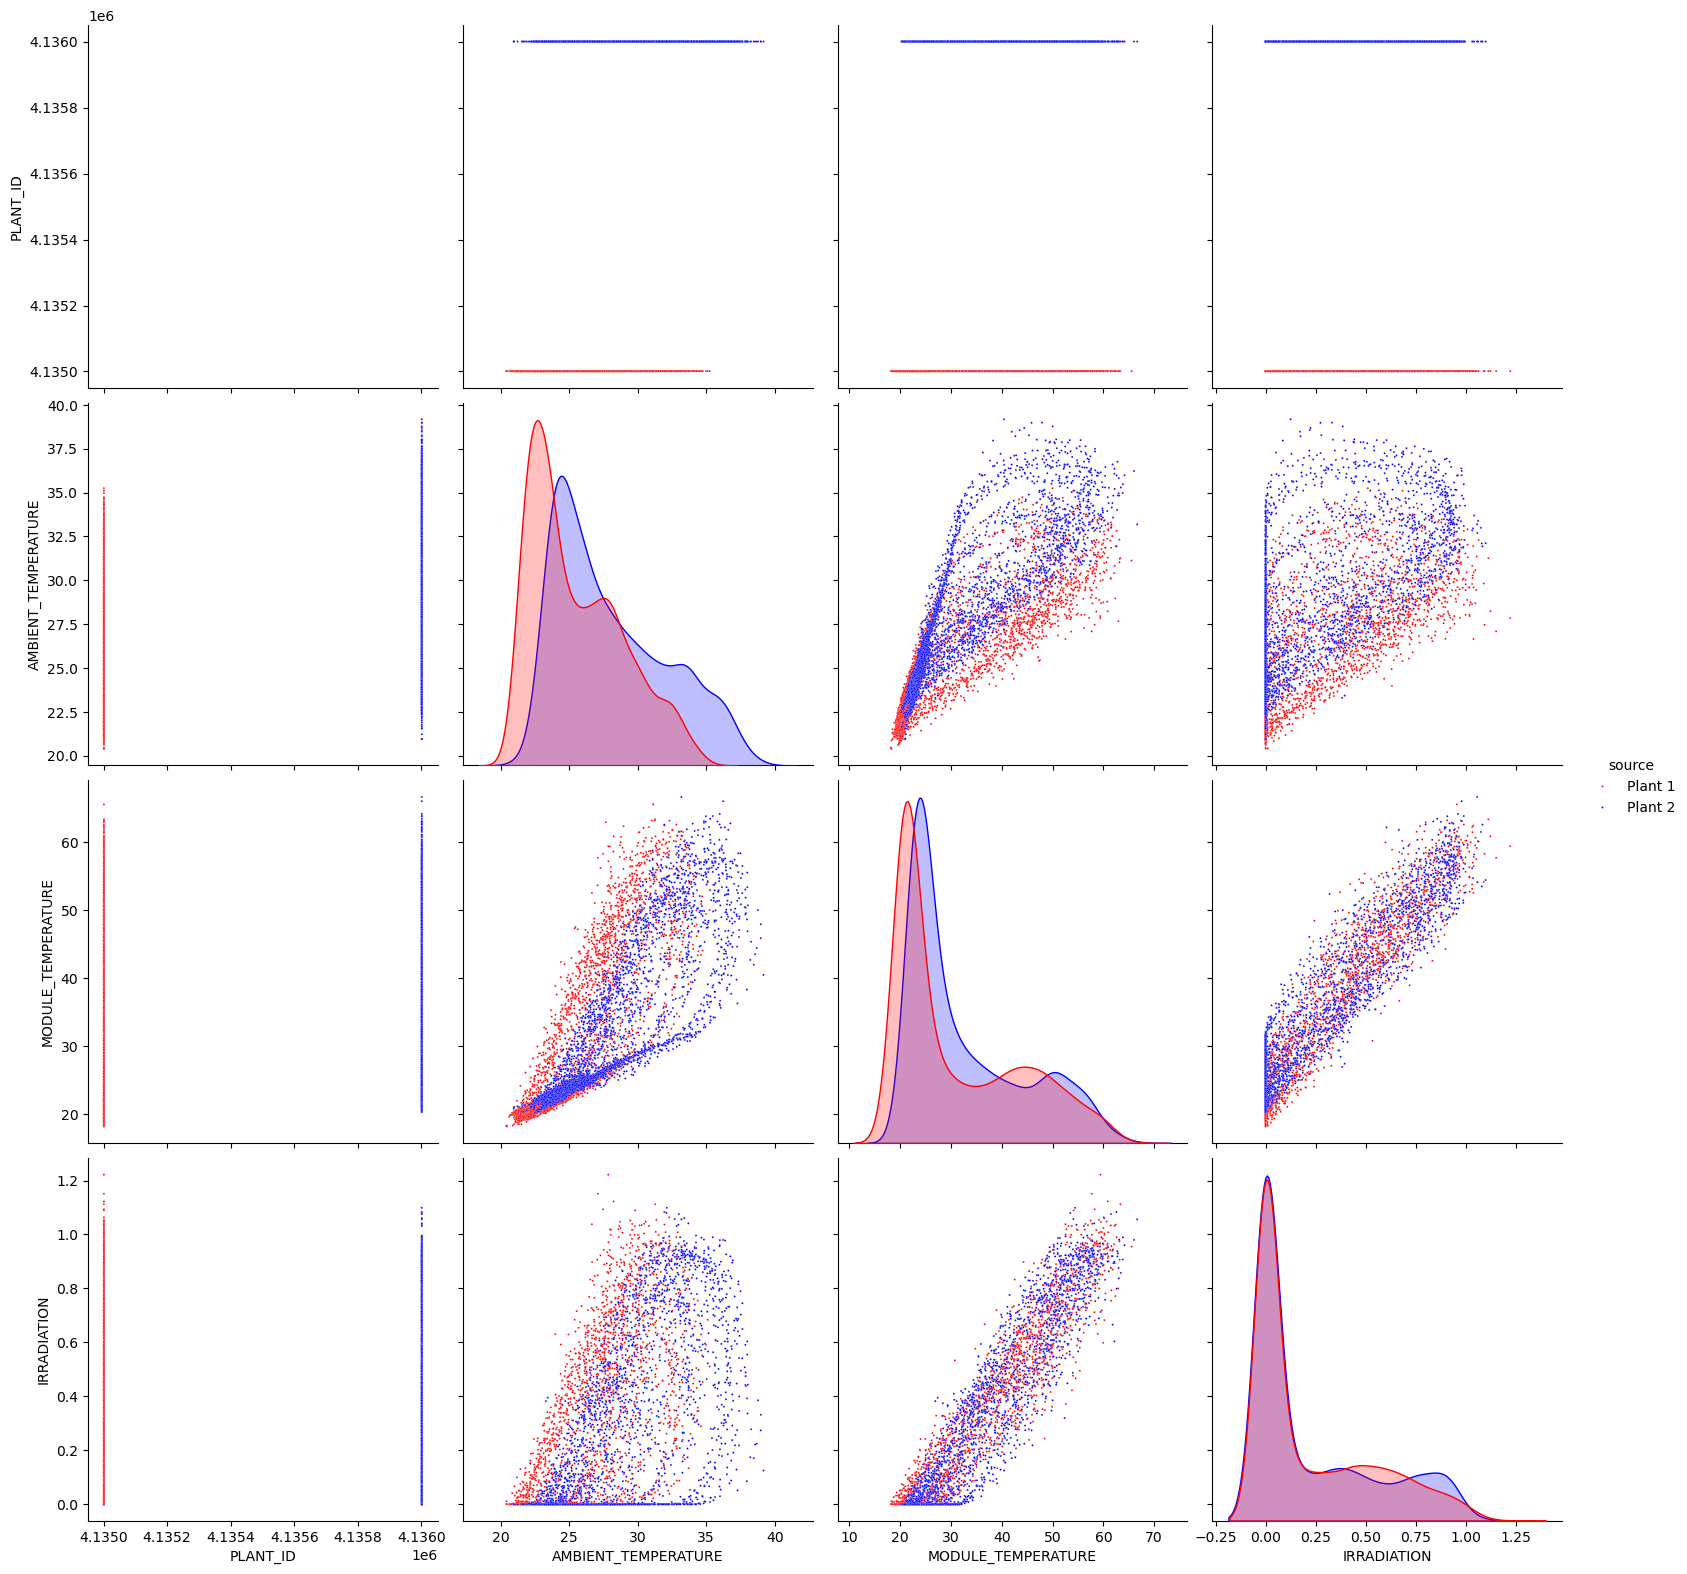

In [110]:
# Строим pairplot с разными цветами для источников
sns.pairplot(combined_data_sen, height=4, hue="source", palette={"Plant 1": "red", "Plant 2": "blue"}, plot_kws={'s': 2})

plt.show()

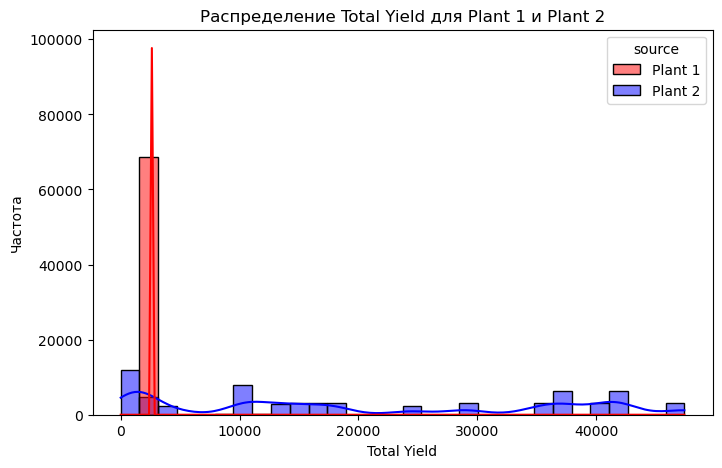

In [111]:
combined_data_log = combined_data_gen.copy()

# Применяем логарифм к столбцу TOTAL_YIELD
combined_data_log["TOTAL_YIELD"] = np.power(combined_data_log["TOTAL_YIELD"], 1/2)

# Строим гистограмму Total Yield с разными цветами
plt.figure(figsize=(8, 5))
sns.histplot(combined_data_log, x="TOTAL_YIELD", hue="source", palette={"Plant 1": "red", "Plant 2": "blue"}, kde=True, bins=30)
plt.title("Распределение Total Yield для Plant 1 и Plant 2")
plt.xlabel("Total Yield")
plt.ylabel("Частота")
plt.show()


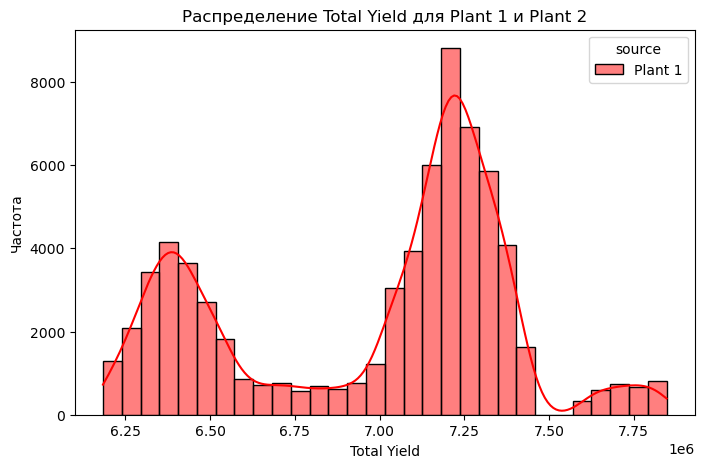

In [112]:
# Строим гистограмму Total Yield с разными цветами
plt.figure(figsize=(8, 5))
sns.histplot(plant_1_generation, x="TOTAL_YIELD", hue="source", palette={"Plant 1": "red", "Plant 2": "blue"}, kde=True, bins=30)
plt.title("Распределение Total Yield для Plant 1 и Plant 2")
plt.xlabel("Total Yield")
plt.ylabel("Частота")
plt.show()

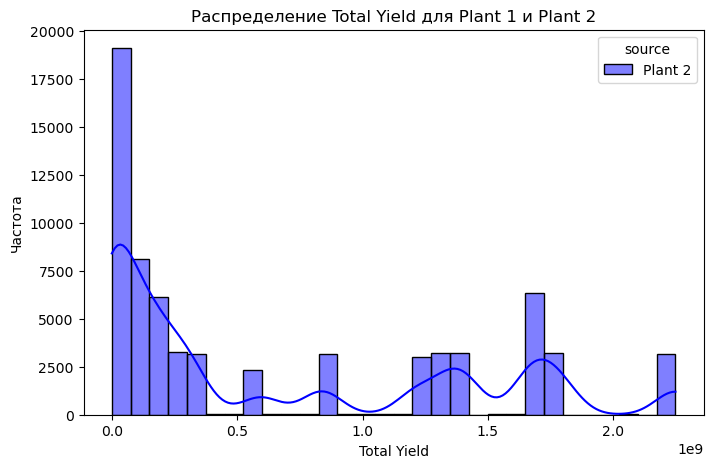

In [113]:
# Строим гистограмму Total Yield с разными цветами
plt.figure(figsize=(8, 5))
sns.histplot(plant_2_generation, x="TOTAL_YIELD", hue="source", palette={"Plant 1": "red", "Plant 2": "blue"}, kde=True, bins=30)
plt.title("Распределение Total Yield для Plant 1 и Plant 2")
plt.xlabel("Total Yield")
plt.ylabel("Частота")
plt.show()

##### Судя по сенсорам, плантации получают примерно одинаковое количества тепла на одну панель, это можно понять по одинаковому количеству облучения которое получают панели.
##### Первая плантация расположена в более жарком регионе.
##### Судя по выроботке, AC_POWER - немного больше выробатывается на второй плантации.
##### DC_POWER - гораздо больше производится на второй плантации.
##### DAILY_YIELD - у второй плантации выше чем у первой
##### Количество панелей на 1 и 2 плантации - 22 и 22 соответственно
##### Наблюдения за 1 и 2 плантацией велись в одном временном промежутке
##### Из вопросов к автору можно узнать что Plant 1 is near Gandikotta, Andhra and Plant 2 is near Nasik, Maharashtra.


### Тут я понял что показатель TOTAL_YIELD на самом деле ведется с момента существования модуля и не отображает реальные показатели на момент временного промежутке. (Вообще в описании написанно что это общая выроботанная энергия за все время, оказывается не за время замеров а за время существования модуля) Поэтому было решено добавить параметр который отображает реальную выроботку за временной промежуток и является суммой DAILY_YIELD (Я его вывел отняв TOTAL_YIELD для конкретного времени минус TOTAL_YIELD когда начиналсь замеры)

In [114]:
# Convert 'DATE_TIME' column to datetime
test_1 = plant_1_generation.copy()
test_1['DATE_TIME'] = pd.to_datetime(plant_1_generation['DATE_TIME'])

# Reformat 'DATE_TIME' and get the first row as a string
start_date_plant_1_generation = test_1['DATE_TIME'].iloc[0].strftime('%Y-%m-%d %H:%M')
end_date_plant_1_generation = test_1['DATE_TIME'].iloc[-1].strftime('%Y-%m-%d %H:%M')

print(start_date_plant_1_generation)  # First row as string
print(end_date_plant_1_generation)    # Last row as string

# Convert 'DATE_TIME' column to datetime
test_2 = plant_2_generation.copy()
test_2['DATE_TIME'] = pd.to_datetime(test_2['DATE_TIME'])

# Reformat 'DATE_TIME' and get the first row as a string
start_date_plant_2_generation = test_2['DATE_TIME'].iloc[0].strftime('%Y-%m-%d %H:%M')
end_date_plant_2_generation = test_2['DATE_TIME'].iloc[-1].strftime('%Y-%m-%d %H:%M')

print(start_date_plant_2_generation)  # First row as string
print(end_date_plant_2_generation)    # Last row as string


2020-05-15 00:00
2020-06-17 23:45
2020-05-15 00:00
2020-06-17 23:45


C:\Users\Acer\AppData\Local\Temp\ipykernel_18628\1518102512.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  test_1['DATE_TIME'] = pd.to_datetime(plant_1_generation['DATE_TIME'])


### Оказалось что данные с панели YxYtjZvoooNbGkE не идут с момента начала отсчета они идут чуть позднее и чтобы не переписывать прям все, было решено просто тут вместо нуля поставить число TOTAL_YIELD с начала по ключу YxYtjZvoooNbGkE
- lambda row: row["TOTAL_YIELD"] - dict_plant_1.get(row["SOURCE_KEY"], 7179966.000), axis=1

In [115]:
plant_1_generation['DATE_TIME'] = pd.to_datetime(plant_1_generation['DATE_TIME'])
plant_1_generation['DATE_TIME'] = plant_1_generation['DATE_TIME'].dt.strftime('%Y-%m-%d %H:%M')
plant_2_generation['DATE_TIME'] = pd.to_datetime(plant_2_generation['DATE_TIME'])
plant_2_generation['DATE_TIME'] = plant_2_generation['DATE_TIME'].dt.strftime('%Y-%m-%d %H:%M')
plant_1_weather_sensor['DATE_TIME'] = pd.to_datetime(plant_1_weather_sensor['DATE_TIME'])
plant_1_weather_sensor['DATE_TIME'] = plant_1_weather_sensor['DATE_TIME'].dt.strftime('%Y-%m-%d %H:%M')
plant_2_weather_sensor['DATE_TIME'] = pd.to_datetime(plant_2_weather_sensor['DATE_TIME'])
plant_2_weather_sensor['DATE_TIME'] = plant_2_weather_sensor['DATE_TIME'].dt.strftime('%Y-%m-%d %H:%M')

# Create the dictionary with SOURCE_KEY as the key and TOTAL_YIELD as the value if DATE_TIME matches start_date_plant_1_generation
dict_plant_1 = {
    row["SOURCE_KEY"]: row["TOTAL_YIELD"]
    for _, row in plant_1_generation.iterrows()
    if row["DATE_TIME"] == start_date_plant_1_generation
}

# Create the 'gap_yield' column by subtracting the dictionary value from 'TOTAL_YIELD'
plant_1_generation["GAP_YIELD"] = plant_1_generation.apply(
    lambda row: row["TOTAL_YIELD"] - dict_plant_1.get(row["SOURCE_KEY"], 7179966.0), axis=1
)

dict_plant_2 = {
    row["SOURCE_KEY"]: row["TOTAL_YIELD"]
    for _, row in plant_2_generation.iterrows()
    if row["DATE_TIME"] == start_date_plant_2_generation
}
# Create the 'gap_yield' column by subtracting the dictionary value from 'TOTAL_YIELD'
plant_2_generation["GAP_YIELD"] = plant_2_generation.apply(
    lambda row: row["TOTAL_YIELD"] - dict_plant_2.get(row["SOURCE_KEY"], 0), axis=1
)

# Filter the DataFrame to include only rows with the desired SOURCE_KEY
filtered_df = plant_1_generation[plant_1_generation['SOURCE_KEY'] == 'YxYtjZvoooNbGkE']

# Head 5 rows from the filtered DataFrame
sampled_data = filtered_df.head(5)
sampled_data

C:\Users\Acer\AppData\Local\Temp\ipykernel_18628\600573536.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  plant_1_generation['DATE_TIME'] = pd.to_datetime(plant_1_generation['DATE_TIME'])


DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
91   2020-05-15 01:00   4135001  YxYtjZvoooNbGkE       0.0       0.0   
155  2020-05-15 01:45   4135001  YxYtjZvoooNbGkE       0.0       0.0   
366  2020-05-15 04:15   4135001  YxYtjZvoooNbGkE       0.0       0.0   
388  2020-05-15 04:30   4135001  YxYtjZvoooNbGkE       0.0       0.0   
410  2020-05-15 04:45   4135001  YxYtjZvoooNbGkE       0.0       0.0   

     DAILY_YIELD  TOTAL_YIELD   source  GAP_YIELD  
91           0.0    7179966.0  Plant 1        0.0  
155          0.0    7179966.0  Plant 1        0.0  
366          0.0    7179966.0  Plant 1        0.0  
388          0.0    7179966.0  Plant 1        0.0  
410          0.0    7179966.0  Plant 1        0.0

In [116]:
plant_1_generation.head(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  2020-05-15 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  2020-05-15 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  2020-05-15 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  2020-05-15 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD   source  GAP_YIELD  
0          0.0    6259559.0  Plant 1        0.0  
1          0.0    6183645.0  Plant 1        0.0  
2          0.0    6987759.0  Plant 1        0.0  
3          0.0    7602960.0  Plant 1        0.0  
4          0.0    7158964.0  Plant 1        0.0

In [117]:
plant_2_generation.head(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3  2020-05-15 00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4  2020-05-15 00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD   source  GAP_YIELD  
0  9425.000000  2.429011e+06  Plant 2        0.0  
1     0.000000  1.215279e+09  Plant 2        0.0  
2  3075.333333  2.247720e+09  Plant 2        0.0  
3   269.933333  1.704250e+06  Plant 2        0.0  
4  3177.000000  1.994153e+07  Plant 2        0.0

In [118]:
plant_1_generation["source"] = "Plant 1" #red
plant_2_generation["source"] = "Plant 2" #blue
plant_1_weather_sensor["source"] = "Plant 1" #red
plant_2_weather_sensor["source"] = "Plant 2" #blue
combined_data_gen = pd.concat([plant_1_generation, plant_2_generation], ignore_index=True)
combined_data_sen = pd.concat([plant_1_weather_sensor, plant_2_weather_sensor], ignore_index=True)

c:\Users\Acer\.conda\envs\ml_2025\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Acer\.conda\envs\ml_2025\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


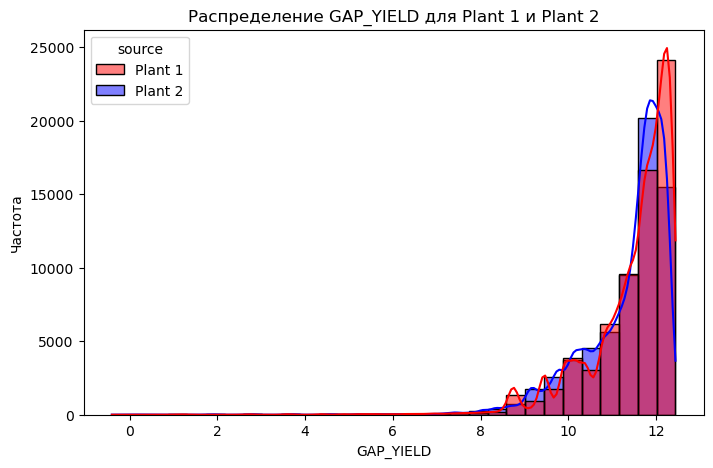

In [119]:
# Adding source columnsplant_1_generation["source"] = "Plant 1"
plant_2_generation["source"] = "Plant 2"

# Applying logarithm transformation
combined_data_log = combined_data_gen.copy()
combined_data_log["GAP_YIELD"] = np.log(combined_data_log["GAP_YIELD"])

# Plotting the histogram
plt.figure(figsize=(8, 5))
sns.histplot(combined_data_log, x="GAP_YIELD", hue="source", palette={"Plant 1": "red", "Plant 2": "blue"}, kde=True, bins=30)
plt.title("Распределение GAP_YIELD для Plant 1 и Plant 2")
plt.xlabel("GAP_YIELD")
plt.ylabel("Частота")
plt.show()


### Получается теоретически через TOTAL_YIELD можно понять реальный износ солнечных панелей, но я этого делать не буду так как у нас всего один сезон. Если учесть идеальные условия когда панели получают одинаковое количества излучения от солнца(что невозможно) то как раз таки показатель TOTAL_YIELD сильно бы влиял на выроботку AC_POWER и DC_POWER, т.к чем больше энергии панель выроболтала до этого, тем меньше она будет выробатывать после, так как пластины изнашиваются. 

### ОБЩАЯ ВЫРОБОТКА ДЛЯ КАЖДОЙ ПЛАСТИНЫ ЗА ВРЕМЕННОЙ ПРОМЕЖУТОК ТАКАЯ

In [120]:
max_gap_yield_plant_1 = plant_1_generation.groupby('SOURCE_KEY')['GAP_YIELD'].max()
max_gap_yield_plant_1


SOURCE_KEY
1BY6WEcLGh8j5v7    225760.0
1IF53ai7Xc0U56Y    249921.0
3PZuoBAID5Wc2HD    249666.0
7JYdWkrLSPkdwr4    243861.0
McdE0feGgRqW7Ca    249623.0
VHMLBKoKgIrUVDU    249800.0
WRmjgnKYAwPKWDb    244859.0
YxYtjZvoooNbGkE    245476.0
ZnxXDlPa8U1GXgE    248565.0
ZoEaEvLYb1n2sOq    243654.0
adLQvlD726eNBSB    253153.0
bvBOhCH3iADSZry    222206.0
iCRJl6heRkivqQ3    248271.0
ih0vzX44oOqAx2f    240945.0
pkci93gMrogZuBj    246328.0
rGa61gmuvPhdLxV    245404.0
sjndEbLyjtCKgGv    244849.0
uHbuxQJl8lW7ozc    248321.0
wCURE6d3bPkepu2    246003.0
z9Y9gH1T5YWrNuG    243338.0
zBIq5rxdHJRwDNY    243989.0
zVJPv84UY57bAof    247121.0
Name: GAP_YIELD, dtype: float64

In [121]:
max_gap_yield_plant_2 = plant_2_generation.groupby('SOURCE_KEY')['GAP_YIELD'].max()
max_gap_yield_plant_2


SOURCE_KEY
4UPUqMRk7TRMgml    224484.0
81aHJ1q11NBPMrL    207063.0
9kRcWv60rDACzjR    196718.0
Et9kgGMDl729KT4    149912.0
IQ2d7wF4YD8zU1Q    243539.0
LYwnQax7tkwH5Cb    157246.0
LlT2YUhhzqhg5Sw    196155.0
Mx2yZCDsyf6DPfv    229705.0
NgDl19wMapZy17u    233374.0
PeE6FRyGXUgsRhN    198413.0
Qf4GUc1pJu5T6c6    225299.0
Quc1TzYxW2pYoWX    136793.0
V94E5Ben1TlhnDV    209396.0
WcxssY2VbP4hApt    216657.0
mqwcsP2rE7J0TFp    234986.0
oZ35aAeoifZaQzV    223842.0
oZZkBaNadn6DNKz    204376.0
q49J1IKaHRwDQnt    180835.0
rrq4fwE8jgrTyWY    167248.0
vOuJvMaM2sgwLmb    215729.0
xMbIugepa2P7lBB    239773.0
xoJJ8DcxJEcupym    192148.0
Name: GAP_YIELD, dtype: float64

In [122]:
# Group the DataFrame by 'SOURCE_KEY', find the maximum 'GAP_YIELD' for each group, and then sum them
sum_max_gap_yield_plant_1 = plant_1_generation.groupby('SOURCE_KEY')['GAP_YIELD'].max().sum()

# Display the result
print("Plant 1:",sum_max_gap_yield_plant_1)

# Group the DataFrame by 'SOURCE_KEY', find the maximum 'GAP_YIELD' for each group, and then sum them
sum_max_gap_yield_plant_2 = plant_2_generation.groupby('SOURCE_KEY')['GAP_YIELD'].max().sum()

# Display the result
print("Plant 2:",sum_max_gap_yield_plant_2)


Plant 1: 5381113.0
Plant 2: 4483691.0


In [123]:
sum_max_gap_yield_plant_1/sum_max_gap_yield_plant_2

np.float64(1.200152508279451)

### Значит первая плантация вырабатала больше энергии в общем чем вторая. В общем на 20%. Что странно, так как средняя температура в первом регионе ниже чем во втором. Скорее всего это связанно с выроботкой DC_POWER и AC_POWER на первой плантации так как там она на порядок выше чем на второй плантации.

Средняя температура MODULE_TEMPERATURE на Plant 1: 31.09°C
Средняя температура MODULE_TEMPERATURE на Plant 2: 32.77°C
Общая средняя температура MODULE_TEMPERATURE на обеих плантациях: 31.94°C


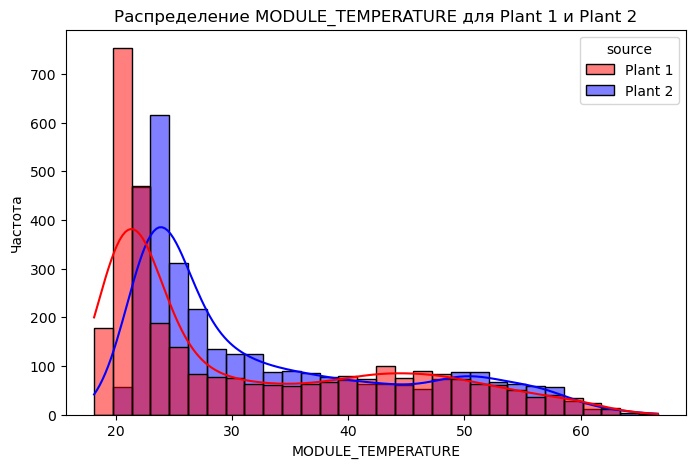

In [124]:
# Вычисляем среднюю температуру для каждой плантации
avg_temp_plant_1 = plant_1_weather_sensor["MODULE_TEMPERATURE"].mean()
avg_temp_plant_2 = plant_2_weather_sensor["MODULE_TEMPERATURE"].mean()

# Вывод результатов
print(f"Средняя температура MODULE_TEMPERATURE на Plant 1: {avg_temp_plant_1:.2f}°C")
print(f"Средняя температура MODULE_TEMPERATURE на Plant 2: {avg_temp_plant_2:.2f}°C")

# Общая средняя температура по всем данным
avg_temp_overall = combined_data_sen["MODULE_TEMPERATURE"].mean()
print(f"Общая средняя температура MODULE_TEMPERATURE на обеих плантациях: {avg_temp_overall:.2f}°C")

# Plotting the histogram
plt.figure(figsize=(8, 5))
sns.histplot(combined_data_sen, x="MODULE_TEMPERATURE", hue="source", palette={"Plant 1": "red", "Plant 2": "blue"}, kde=True, bins=30)
plt.title("Распределение MODULE_TEMPERATURE для Plant 1 и Plant 2")
plt.xlabel("MODULE_TEMPERATURE")
plt.ylabel("Частота")
plt.show()


Средняя DC_POWER на Plant 1: 3147.43
Средняя DC_POWER на Plant 2: 246.70


c:\Users\Acer\.conda\envs\ml_2025\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


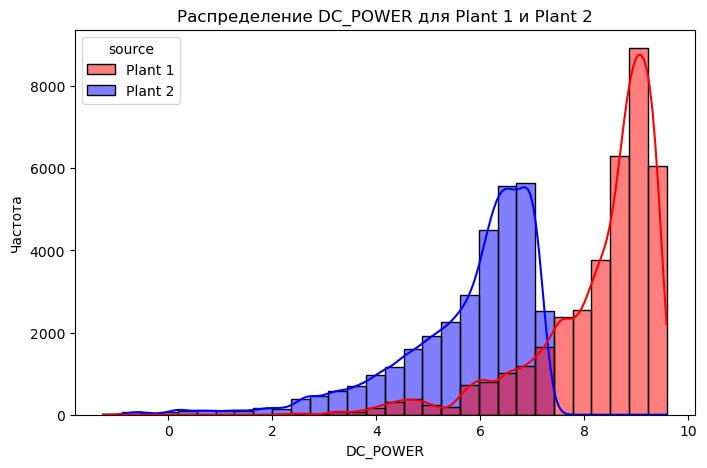

In [125]:
avg_dc_plant_1 = plant_1_generation["DC_POWER"].mean()
avg_dc_plant_2 = plant_2_generation["DC_POWER"].mean()

print(f"Средняя DC_POWER на Plant 1: {avg_dc_plant_1:.2f}")
print(f"Средняя DC_POWER на Plant 2: {avg_dc_plant_2:.2f}")

# Adding source columns
plant_1_generation["source"] = "Plant 1"
plant_2_generation["source"] = "Plant 2"

# Applying logarithm transformation
combined_data_log = combined_data_gen.copy()
combined_data_log["DC_POWER"] = np.log(combined_data_log["DC_POWER"])

# Plotting the histogram
plt.figure(figsize=(8, 5))
sns.histplot(combined_data_log, x="DC_POWER", hue="source", palette={"Plant 1": "red", "Plant 2": "blue"}, kde=True, bins=30)
plt.title("Распределение DC_POWER для Plant 1 и Plant 2")
plt.xlabel("DC_POWER")
plt.ylabel("Частота")
plt.show()

Средняя AC_POWER на Plant 1: 307.80
Средняя AC_POWER на Plant 2: 241.28


c:\Users\Acer\.conda\envs\ml_2025\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


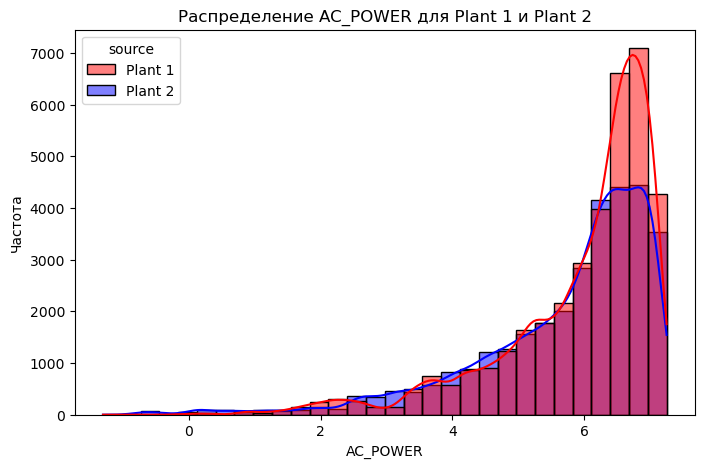

In [126]:
avg_ac_plant_1 = plant_1_generation["AC_POWER"].mean()
avg_ac_plant_2 = plant_2_generation["AC_POWER"].mean()

print(f"Средняя AC_POWER на Plant 1: {avg_ac_plant_1:.2f}")
print(f"Средняя AC_POWER на Plant 2: {avg_ac_plant_2:.2f}")

# Applying logarithm transformation
combined_data_log = combined_data_gen.copy()
combined_data_log["AC_POWER"] = np.log(combined_data_log["AC_POWER"])

# Plotting the histogram
plt.figure(figsize=(8, 5))
sns.histplot(combined_data_log, x="AC_POWER", hue="source", palette={"Plant 1": "red", "Plant 2": "blue"}, kde=True, bins=30)
plt.title("Распределение AC_POWER для Plant 1 и Plant 2")
plt.xlabel("AC_POWER")
plt.ylabel("Частота")
plt.show()

### Возможно на первой плантации больше солнечного времени чем на второй, рассмотрим количество колонок когда DC_POWER != 0 для плантаций. И да на первой плантации больше солнечного времени чем на второй. Вот и ответ.

In [127]:
plant_1_generation_not_zero = plant_1_generation[plant_1_generation["DC_POWER"]!= 0]
plant_2_generation_not_zero = plant_2_generation[plant_2_generation["DC_POWER"]!= 0]

print(f"Количество колонок DC_POWER!= 0 на Plant 1: {len(plant_1_generation_not_zero)}")
print(f"Количество колонок DC_POWER!= 0 на Plant 2: {len(plant_2_generation_not_zero)}")

Количество колонок DC_POWER!= 0 на Plant 1: 36827
Количество колонок DC_POWER!= 0 на Plant 2: 32036


# 2.Определите, какое моделирование доступно для ваших данных. Какие есть в них связи?

### Связи:
- В первую очередь у всех данных имеется связь со временем
- Получить доступ к каждой отдельной панели мы можем через SOURCE_KEY
- Имеется связь между температурой, излучением и выработкйо электроэнергии
### Моделирование:
- Временных рядов
- Кластеризации
- Классификация
- Регрессионного анализа

# 3.Опишите возможные верхнеуровневые задачи, которые можно решать с помощью таких данных.

- Можно смоделировать временные ряды с этими данными, анализировав зависимость параметров во времени
- Можно кластеризовать панели по эффективности за определенный временной промежуток
- Можно классифицировать к какой плантации какая панель относится
- Можно занятся регрессионным анализом и понять как излучение и температура влияют на выработку энергии
- Можно предсказывать примерную дневную и общую выработку на будующее, на основе уже имеющихся данных

# 4.Очистите и обработайте данные. Опишите, какие в них были проблемы.

#### Частично в момент анализа данных пришлось привести данные в пригодный вид, так как часть колонок была не информативна.
#### Поэтому и появилась колонка GAP_YIELD
#### Часть проблем с которыми я столкнулся описана выше
#### Сейчас нужно привести временные промежутки в нормальный вид, хочу посмотреть их распределение.
#### Также хочу убрать лишние колонки которые не несут никакой информации.

#### По поводу временных промежутков, есть енсколько вариантов как с ними работать, но так как в будующем будет использоваться регрессия было решено добавить еще столбец который будудет обозначать время. Буду использовать своего рода самодельный Encoder, так как есть идея разбить время на 15 минутные промежутки и попробывать каждому такому промежутку дать число. Точкой отсчета будет самая первая дата, конца - последняя дата. Рассмотрим общее число на дату и время - это похоже на время системы (секунды с 1970 года).

In [128]:
plant_1_weather_sensor.head(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION   source  
0           22.857507          0.0  Plant 1  
1           22.761668          0.0  Plant 1  
2           22.592306          0.0  Plant 1  
3           22.360852          0.0  Plant 1  
4           22.165423          0.0  Plant 1

#### В первом случае создам просто переменную TICKS, Во втором TICKS_DATE, TICKS_TIME

### Объеденим данные о выроботке и данные с сенсоров 

In [129]:
plant_1_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
 7   source       68778 non-null  object 
 8   GAP_YIELD    68778 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 4.7+ MB


In [130]:
plant_1_weather_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
 6   source               3182 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 174.1+ KB


In [131]:
plant_1_weather_sensor.head(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION   source  
0           22.857507          0.0  Plant 1  
1           22.761668          0.0  Plant 1  
2           22.592306          0.0  Plant 1  
3           22.360852          0.0  Plant 1  
4           22.165423          0.0  Plant 1

In [132]:
def FutureEngeneeringGeneration(df_gen, df_sen, start_date):
    
    data_gen = df_gen.copy()
    data_gen = data_gen.drop(["PLANT_ID", "TOTAL_YIELD", "source"], axis=1) 
    data_sen = df_sen.copy()
    data_sen["SOURCE"] = data_sen["source"]
    data_sen = data_sen.drop(["PLANT_ID", "SOURCE_KEY", "source"], axis=1) 
    # Делаем копию датафрейма
    data = pd.merge(data_gen, data_sen, on='DATE_TIME', how='inner')
    
    # Преобразование start_date в формат datetime, если это строка
    if isinstance(start_date, str):
        start_date = pd.to_datetime(start_date)

    # Преобразование DATE_TIME в datetime
    data["DATE_TIME"] = pd.to_datetime(data["DATE_TIME"])

    # Вычисление delta_date_time в 15-минутных тиках
    data["TICKS"] = (data["DATE_TIME"] - start_date).dt.total_seconds() // 900

    return data


# Запускаем функцию
plant_1 = FutureEngeneeringGeneration(plant_1_generation, plant_1_weather_sensor, start_date_plant_1_generation)
plant_2 = FutureEngeneeringGeneration(plant_2_generation, plant_1_weather_sensor, start_date_plant_2_generation)

new_order_generation = [
   "SOURCE", "SOURCE_KEY", "DATE_TIME",  "TICKS", "DC_POWER", "AC_POWER", "DAILY_YIELD", 
   "GAP_YIELD", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"
]
#Переупорядочиваем колонки
plant_1 = plant_1[new_order_generation]
plant_2 = plant_2[new_order_generation]

# Выводим случайные 5 строк
plant_1.sample(5)

SOURCE       SOURCE_KEY           DATE_TIME   TICKS     DC_POWER  \
49320  Plant 1  sjndEbLyjtCKgGv 2020-06-08 18:15:00  2377.0   468.142857   
24571  Plant 1  bvBOhCH3iADSZry 2020-05-27 13:30:00  1206.0  4115.625000   
2788   Plant 1  1BY6WEcLGh8j5v7 2020-05-16 11:30:00   142.0  7335.250000   
17232  Plant 1  sjndEbLyjtCKgGv 2020-05-24 01:00:00   868.0     0.000000   
411    Plant 1  ZnxXDlPa8U1GXgE 2020-05-15 04:45:00    19.0     0.000000   

         AC_POWER  DAILY_YIELD   GAP_YIELD  AMBIENT_TEMPERATURE  \
49320   45.257143  8362.857143  184084.857            27.304531   
24571  404.050000  4334.750000   87231.750            32.206553   
2788   718.150000  2639.000000    8393.000            29.689250   
17232    0.000000     0.000000   64617.000            24.218199   
411      0.000000     0.000000       0.000            24.013224   

       MODULE_TEMPERATURE  IRRADIATION  
49320           26.978831     0.035556  
24571           42.755688     0.299481  
2788            46.518255     0.493431  
17232           21.775757     0.000000  
411             22.306315     0.000000

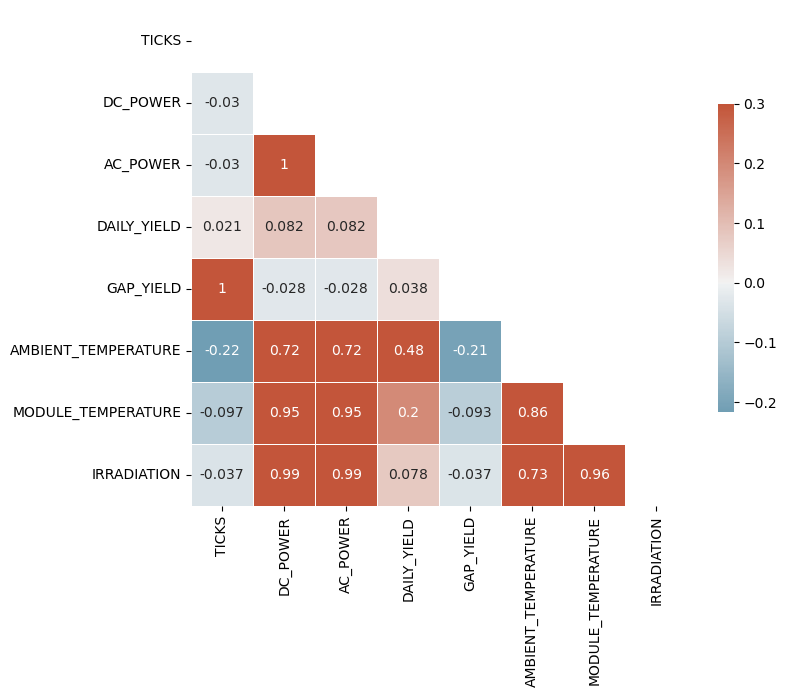

In [133]:
def corrplot(d: pd.DataFrame) -> None:
  corr = d.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  figsize = (min(d.shape[1], 11), min(d.shape[1], 9))
  f, ax = plt.subplots(figsize=figsize)
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
test = plant_1.copy()
test = test.drop(["SOURCE", "SOURCE_KEY", "DATE_TIME"], axis=1) 
corrplot(test)

# 5.Постройте подходящую предсказательную модель. Обоснуйте ее выбор.

### Меня интересует зависимость параметров от времени и части других параметров, наверно задачу с солнечными панелями лучше всего было бы решать через временные ряды. Все таки здесь много параметров являются периодическими.

In [134]:
label_encoder = LabelEncoder()

# Применяем LabelEncoder к столбцу SOURCE_KEY
plant_1['SOURCE_KEY_encoded'] = label_encoder.fit_transform(plant_1['SOURCE_KEY'])
# Применяем LabelEncoder к столбцу SOURCE_KEY
plant_2['SOURCE_KEY_encoded'] = label_encoder.fit_transform(plant_2['SOURCE_KEY'])


In [135]:
plant_2.tail(5)

SOURCE       SOURCE_KEY           DATE_TIME   TICKS  DC_POWER  \
66167  Plant 1  q49J1IKaHRwDQnt 2020-06-17 23:45:00  3263.0       0.0   
66168  Plant 1  rrq4fwE8jgrTyWY 2020-06-17 23:45:00  3263.0       0.0   
66169  Plant 1  vOuJvMaM2sgwLmb 2020-06-17 23:45:00  3263.0       0.0   
66170  Plant 1  xMbIugepa2P7lBB 2020-06-17 23:45:00  3263.0       0.0   
66171  Plant 1  xoJJ8DcxJEcupym 2020-06-17 23:45:00  3263.0       0.0   

       AC_POWER  DAILY_YIELD  GAP_YIELD  AMBIENT_TEMPERATURE  \
66167       0.0       4157.0   180835.0            21.909288   
66168       0.0       3931.0   167248.0            21.909288   
66169       0.0       4322.0   215729.0            21.909288   
66170       0.0       4218.0   239773.0            21.909288   
66171       0.0       4316.0   192148.0            21.909288   

       MODULE_TEMPERATURE  IRRADIATION  SOURCE_KEY_encoded  
66167           20.427972          0.0                  17  
66168           20.427972          0.0                  18  
66169           20.427972          0.0                  19  
66170           20.427972          0.0                  20  
66171           20.427972          0.0                  21

Целевая переменная: AC_POWER
MAE: 1345.6457085861587
R²: 0.9277490068471532
----------------------------------------


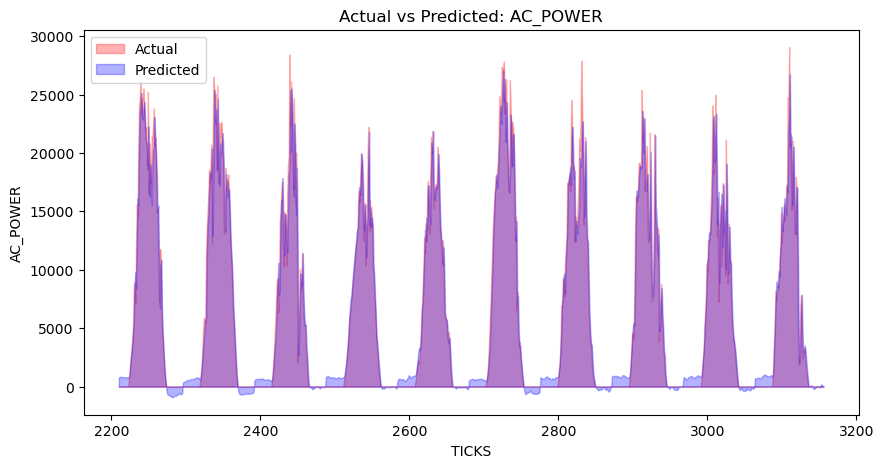

Целевая переменная: DAILY_YIELD
MAE: 43543.64494700842
R²: 0.29740533162568195
----------------------------------------


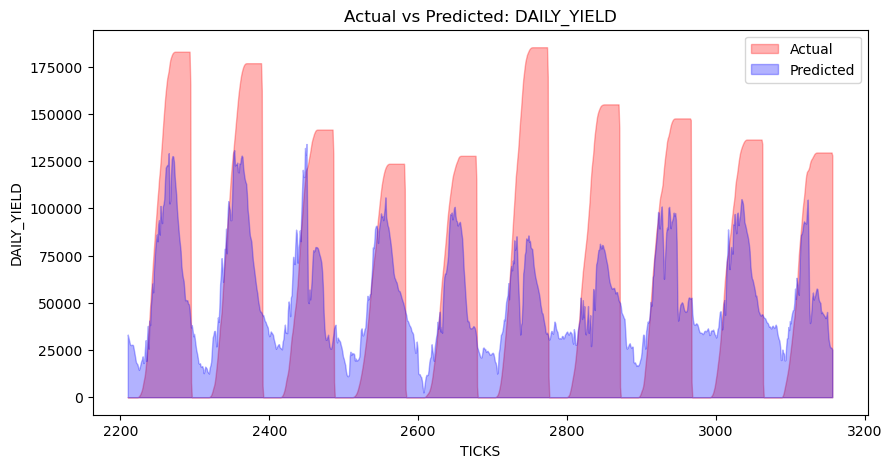

Целевая переменная: MODULE_TEMPERATURE
MAE: 1.3406646858464608
R²: 0.9593613141509341
----------------------------------------


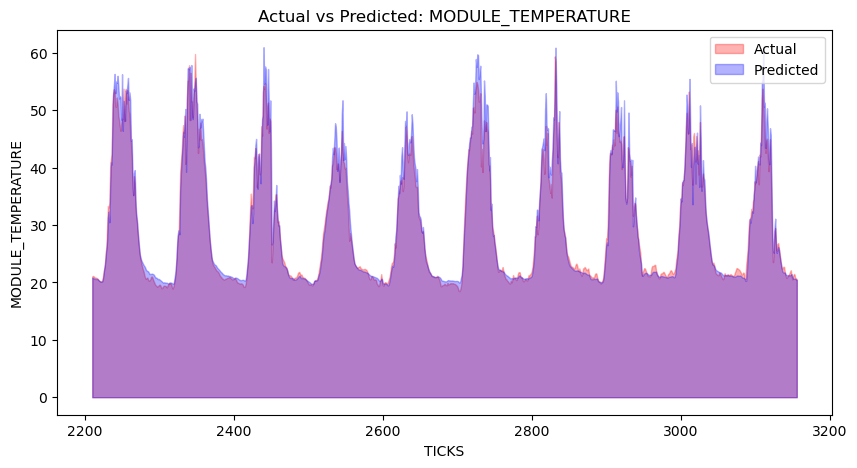

In [136]:
# Группируем данные по TICKS
plant_grouped = plant_1.groupby('TICKS').agg({
    'AC_POWER': 'sum',
    'DC_POWER': 'sum',
    'DAILY_YIELD': 'sum',  # Суммируем, так как у каждой панели свой вклад
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean',
    'IRRADIATION': 'mean'
}).reset_index()

# Создаем лаги
lag_features = ['AC_POWER', 'DC_POWER', 'DAILY_YIELD', 
                'AMBIENT_TEMPERATURE', 
                'MODULE_TEMPERATURE', 'IRRADIATION']

# Перебираем каждую переменную в качестве целевой (y)
for target in lag_features:
    lag_features.remove(target)
        
    for feature in lag_features:
        for lag in range(1, 4):
            plant_grouped[f'{feature}_lag{lag}'] = plant_grouped[feature].shift(lag)

    # Удаляем NaN после создания лагов
    plant_final = plant_grouped.dropna()

    # Разделяем выборку
    train_size = int(len(plant_final) * 0.7)
    X = plant_final[[f'{feat}_lag1' for feat in lag_features]]
    y = plant_final[target]

    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Обучаем модель
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Делаем предсказание
    y_pred = model.predict(X_test)

    # Оценка качества модели
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Целевая переменная: {target}')
    print(f'MAE: {mae}')
    print(f'R²: {r2}')
    print('-' * 40)

    # Строим график
    plt.figure(figsize=(10, 5))
    plt.fill_between(y_test.index, y_test, color='red', alpha=0.3, label='Actual')
    plt.fill_between(y_test.index, y_pred, color='blue', alpha=0.3, label='Predicted')

    plt.title(f'Actual vs Predicted: {target}')
    plt.xlabel('TICKS')
    plt.ylabel(target)
    plt.legend()
    plt.show()


Целевая переменная: AC_POWER
MAE: 1142.8868273702217
R²: 0.8685139682512171
----------------------------------------


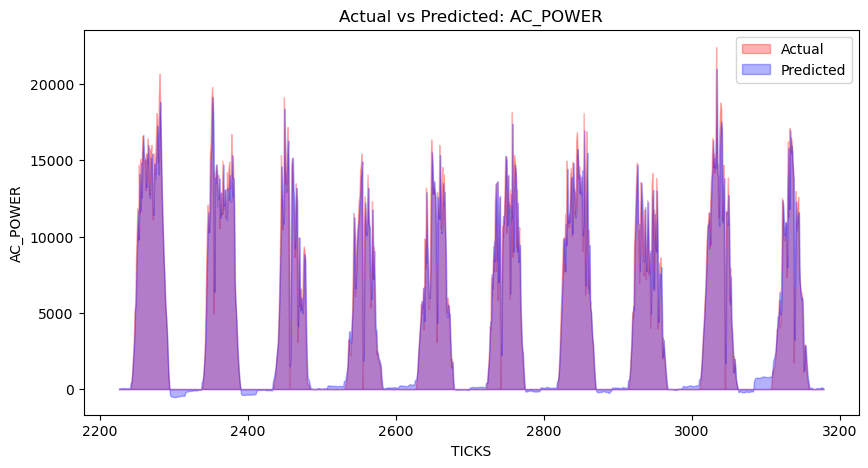

Целевая переменная: DAILY_YIELD
MAE: 30407.86565323185
R²: 0.2234975587554714
----------------------------------------


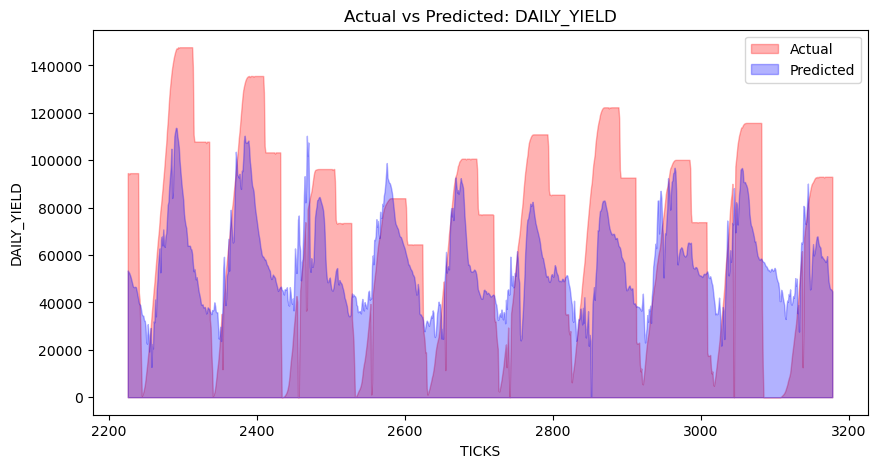

Целевая переменная: MODULE_TEMPERATURE
MAE: 1.219126132574315
R²: 0.9667059232726011
----------------------------------------


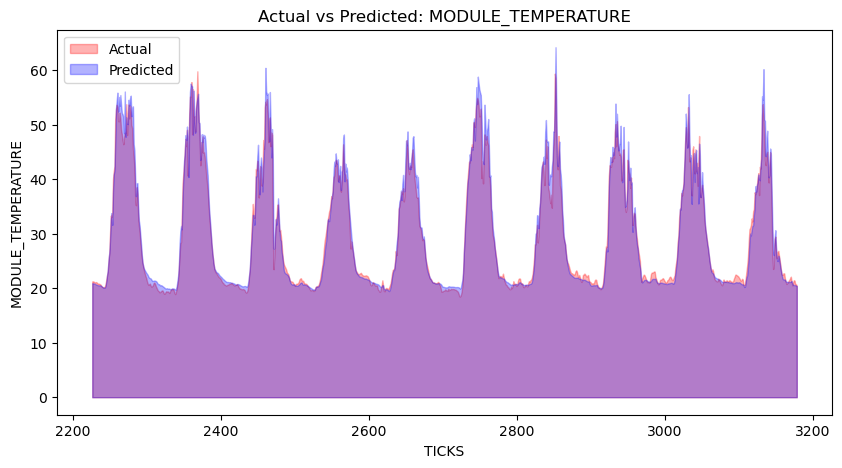

In [137]:
# Группируем данные по TICKS
plant_grouped = plant_2.groupby('TICKS').agg({
    'AC_POWER': 'sum',
    'DC_POWER': 'sum',
    'DAILY_YIELD': 'sum',  # Суммируем, так как у каждой панели свой вклад
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean',
    'IRRADIATION': 'mean'
}).reset_index()

# Создаем лаги
lag_features = ['AC_POWER', 'DC_POWER', 'DAILY_YIELD', 
                'AMBIENT_TEMPERATURE', 
                'MODULE_TEMPERATURE', 'IRRADIATION']

# Перебираем каждую переменную в качестве целевой (y)
for target in lag_features:
    lag_features.remove(target)
        
    for feature in lag_features:
        for lag in range(1, 4):
            plant_grouped[f'{feature}_lag{lag}'] = plant_grouped[feature].shift(lag)

    # Удаляем NaN после создания лагов
    plant_final = plant_grouped.dropna()

    # Разделяем выборку
    train_size = int(len(plant_final) * 0.7)
    X = plant_final[[f'{feat}_lag1' for feat in lag_features]]
    y = plant_final[target]

    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Обучаем модель
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Делаем предсказание
    y_pred = model.predict(X_test)

    # Оценка качества модели
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Целевая переменная: {target}')
    print(f'MAE: {mae}')
    print(f'R²: {r2}')
    print('-' * 40)

    # Строим график
    plt.figure(figsize=(10, 5))
    plt.fill_between(y_test.index, y_test, color='red', alpha=0.3, label='Actual')
    plt.fill_between(y_test.index, y_pred, color='blue', alpha=0.3, label='Predicted')

    plt.title(f'Actual vs Predicted: {target}')
    plt.xlabel('TICKS')
    plt.ylabel(target)
    plt.legend()
    plt.show()


### Как видно, задача поиска DAILY_YIELD за счет других параметров решается отлично через временнные ряды.

### Странно что на плантации 2 падает DAILY_YIELD - это параметр выроботки за день, к концу дня он падает хотя не должен.
    'AC_POWER': 'sum',
    'DC_POWER': 'sum',
    'DAILY_YIELD': 'sum',  # Суммируем, так как у каждой панели свой вклад
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean',
    'IRRADIATION': 'mean'
### Здесь мы рассматриваем сумму DAILY_YIELD от всех 22 панелей.
### Выглядит так как будто панели сами отключаются, надо посмотреть визуализацию

### Дальше хочу визулизировать GIF с изменением параметров на панели, код есть ниже, GIF на github влезли не полностью, вот ссылка на гугл диск, там все лежит.
### https://drive.google.com/drive/folders/1Oo-EiyUGh7T8Lg_qwTf1KADJtWaNrdvM?usp=sharing
### Залепательное занятие.

C:\Users\Acer\AppData\Local\Temp\ipykernel_18628\4051186116.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm")
MovieWriter imagemagick unavailable; using Pillow instead.
C:\Users\Acer\AppData\Local\Temp\ipykernel_18628\4051186116.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm")
MovieWriter imagemagick unavailable; using Pillow instead.
C:\Users\Acer\AppData\Local\Temp\ipykernel_18628\4051186116.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps

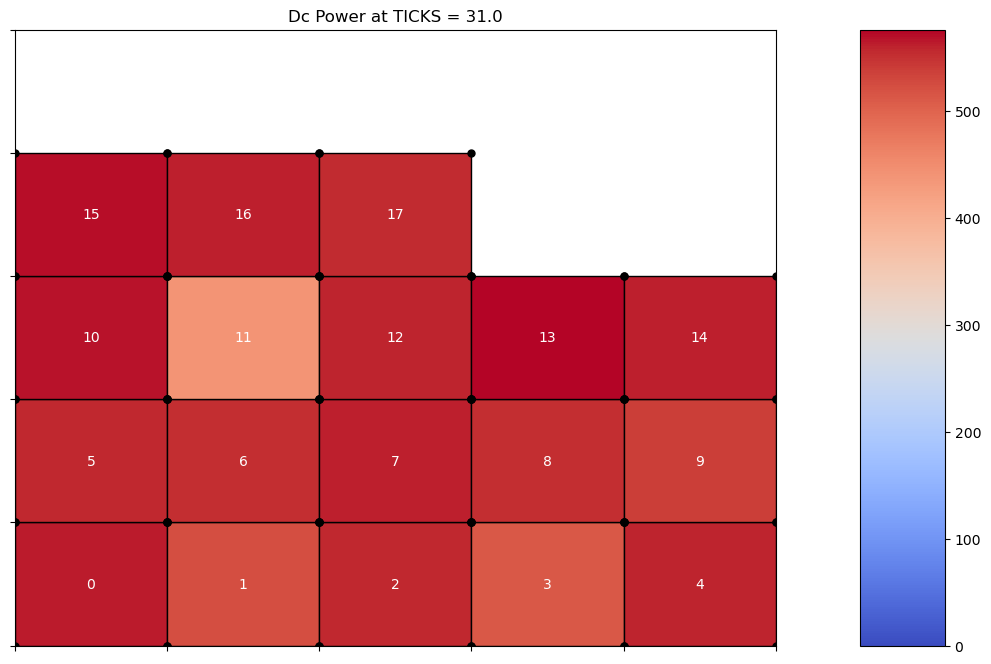

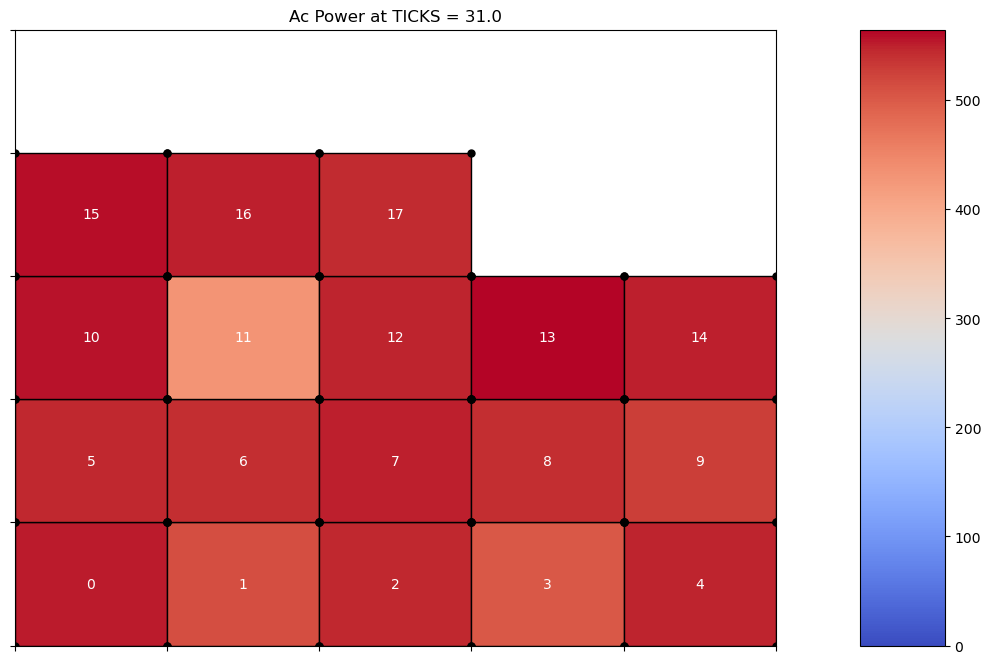

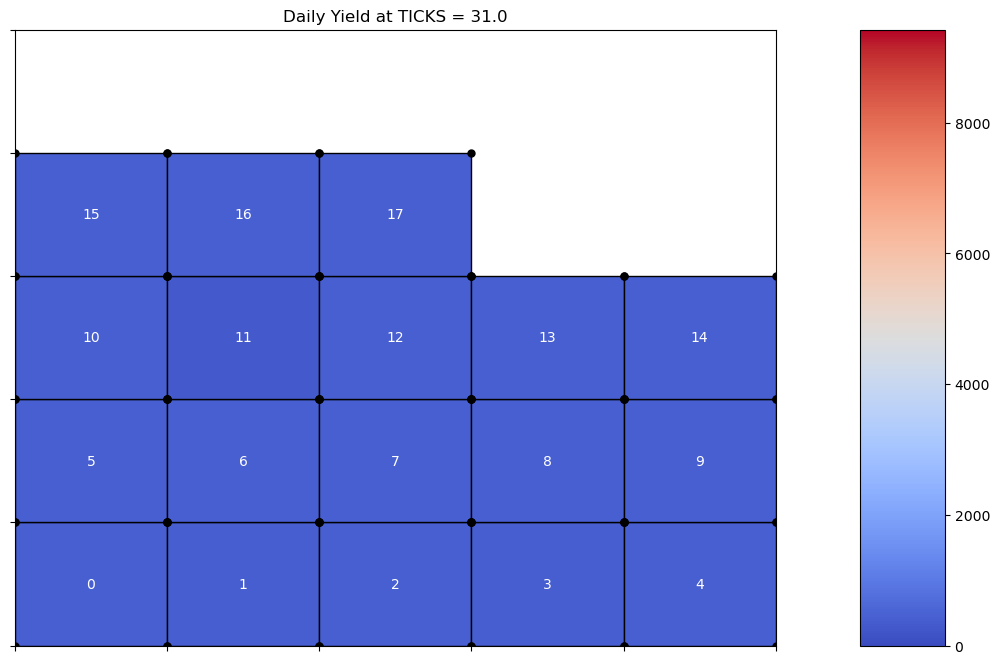

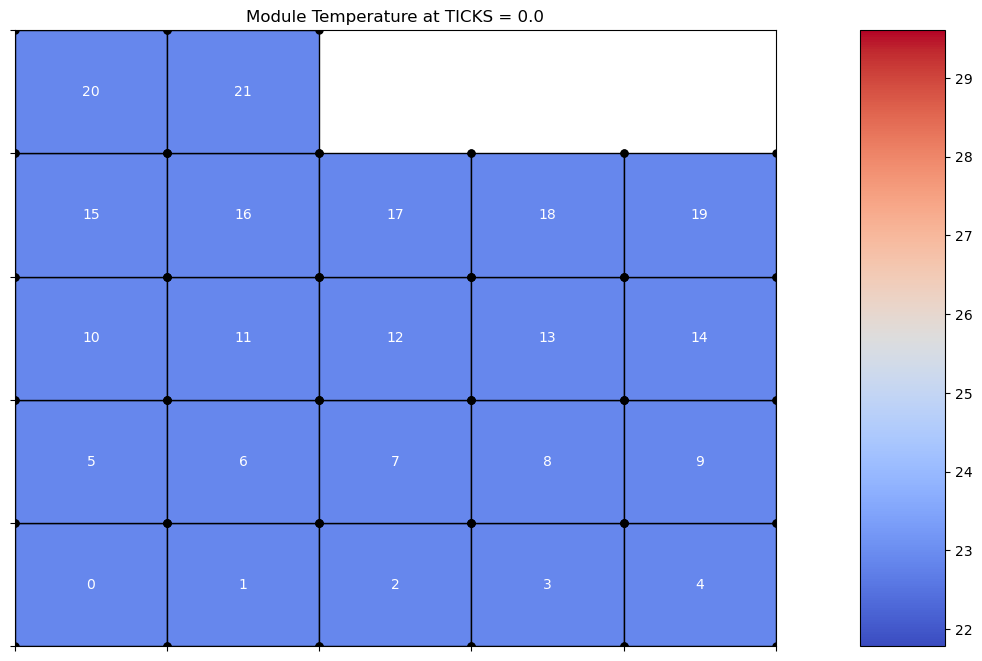

In [138]:

# Функция для создания анимации
def create_panel_animation(df, column, output_filename):
    # Create a color map (blue to red)
    cmap = cm.get_cmap("coolwarm")

    # Normalize the values
    norm = mcolors.Normalize(vmin=df[column].min(), vmax=df[column].max())

    # Grid layout (5x5 grid for 22 panels, with empty spaces)
    grid_rows = 5
    grid_cols = 5

    # Create the plot with gridspec for separate color bar
    fig = plt.figure(figsize=(12, 8))

    # Create subplots with gridspec
    gs = fig.add_gridspec(1, 2, width_ratios=[9, 1])  # Left side for grid, right side for color bar
    ax = fig.add_subplot(gs[0])  # Main panel grid
    cax = fig.add_subplot(gs[1])  # Color bar axis

    # Add square grids (each representing a solar panel) with circles at the corners
    def update(frame):
        ax.clear()  # Clear the previous plot
        
        current_ticks = frame
        current_data = df[df['TICKS'] == current_ticks]

        # For each panel, plot a square with color corresponding to the selected column
        for i, row in enumerate(current_data.iterrows()):
            _, panel_data = row
            panel_idx = panel_data['SOURCE_KEY_encoded']
            value = panel_data[column]
            
            # Get the (row, col) position for the panel in the grid
            row_pos = panel_idx // grid_cols
            col_pos = panel_idx % grid_cols
            
            # Plot the square (representing the panel)
            color = cmap(norm(value))
            square = Rectangle((col_pos, row_pos), 1, 1, linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(square)

            # Plot the circles at the corners of the square
            ax.plot(col_pos, row_pos, 'o', color='black', markersize=5)  # Top-left
            ax.plot(col_pos + 1, row_pos, 'o', color='black', markersize=5)  # Top-right
            ax.plot(col_pos, row_pos + 1, 'o', color='black', markersize=5)  # Bottom-left
            ax.plot(col_pos + 1, row_pos + 1, 'o', color='black', markersize=5)  # Bottom-right
            
            # Add panel number (SOURCE_KEY_encoded) to the center of each square
            ax.text(col_pos + 0.5, row_pos + 0.5, str(panel_idx), ha='center', va='center', color='white', fontsize=10)

        # Set plot limits, labels, and title
        ax.set_xlim(0, grid_cols)
        ax.set_ylim(0, grid_rows)
        ax.set_title(f"{column.replace('_', ' ').title()} at TICKS = {current_ticks}")
        ax.set_xticks(np.arange(0, grid_cols + 1, 1))
        ax.set_yticks(np.arange(0, grid_rows + 1, 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        # Add color bar
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # Empty array for the color bar
        fig.colorbar(sm, cax=cax)

    # Create an animation for all ticks
    ani = FuncAnimation(fig, update, frames=df['TICKS'].unique(), repeat=True)

    # Save the animation as a GIF
    ani.save(output_filename, writer='imagemagick', fps=10)

df = plant_2.head(700)

# Create four different animations for each metric
create_panel_animation(df, 'DC_POWER', 'dc_power_grid.gif')
create_panel_animation(df, 'AC_POWER', 'ac_power_grid.gif')
create_panel_animation(df, 'DAILY_YIELD', 'daily_yield_grid.gif')
create_panel_animation(df, 'MODULE_TEMPERATURE', 'module_temperature_grid.gif')



### Если внимательно смотреть можно заметить как часть панелей не работают, особенно на второй плантации. Скорее всего они частично сломаны или данные о них не поступают.

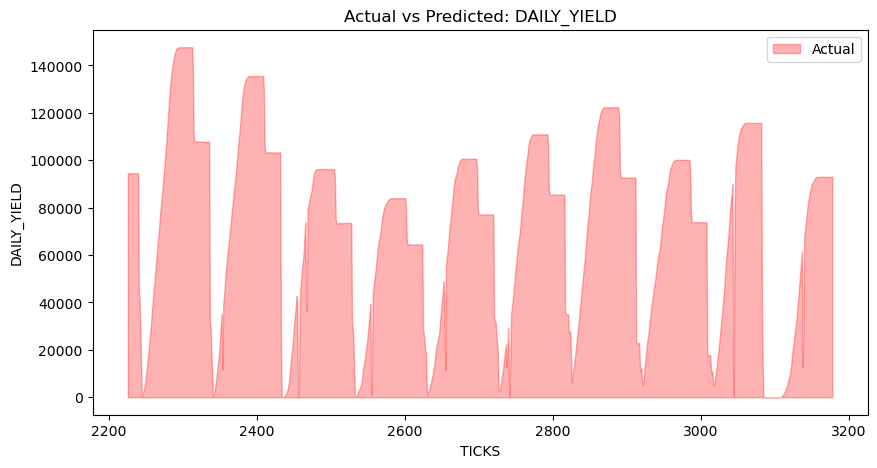

In [139]:
# Группируем данные по TICKS
plant_grouped = plant_2.groupby('TICKS').agg({
    'DAILY_YIELD': 'sum'
}).reset_index()

train_size = int(len(plant_final) * 0.7)

y = plant_final['DAILY_YIELD']

y_train, y_test = y[:train_size], y[train_size:]
# Строим график
plt.figure(figsize=(10, 5))
plt.fill_between(y_test.index, y_test, color='red', alpha=0.3, label='Actual')
plt.title(f'Actual vs Predicted: {'DAILY_YIELD'}')
plt.xlabel('TICKS')
plt.ylabel('DAILY_YIELD')
plt.legend()
plt.show()


### Как видно DAILY_YIELD падает к концу дня, хотя не должен, так как это сумма энергии выработанной за один день, это связанно с утерей части данных с панелей.
### Самый лучший и логичный способ это решить это использовать max(DAILY_YIELD), вместо sum(DAILY_YIELD).

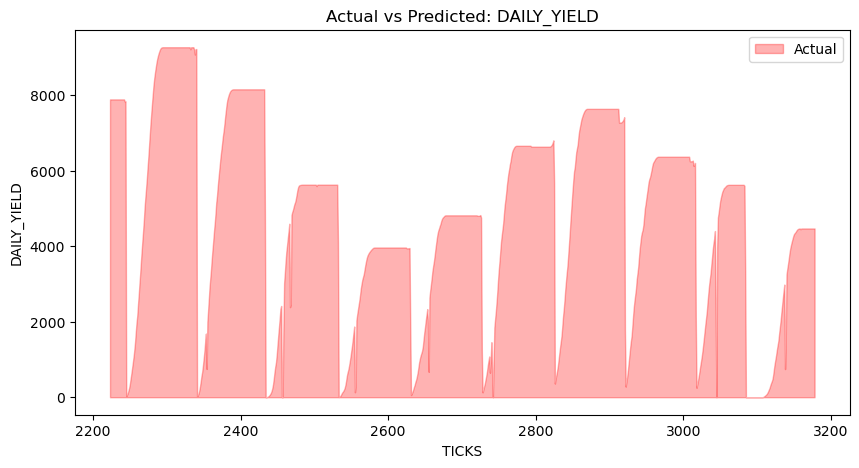

In [140]:
# Группируем данные по TICKS
plant_grouped = plant_2.groupby('TICKS').agg({
    'DAILY_YIELD': 'max'
}).reset_index()

train_size = int(len(plant_final) * 0.7)

y = plant_grouped['DAILY_YIELD']

y_train, y_test = y[:train_size], y[train_size:]
# Строим график
plt.figure(figsize=(10, 5))
plt.fill_between(y_test.index, y_test, color='red', alpha=0.3, label='Actual')
plt.title(f'Actual vs Predicted: {'DAILY_YIELD'}')
plt.xlabel('TICKS')
plt.ylabel('DAILY_YIELD')
plt.legend()
plt.show()

Целевая переменная: AC_POWER
MAE: 1342.9556392461434
R²: 0.9276191134502231
----------------------------------------


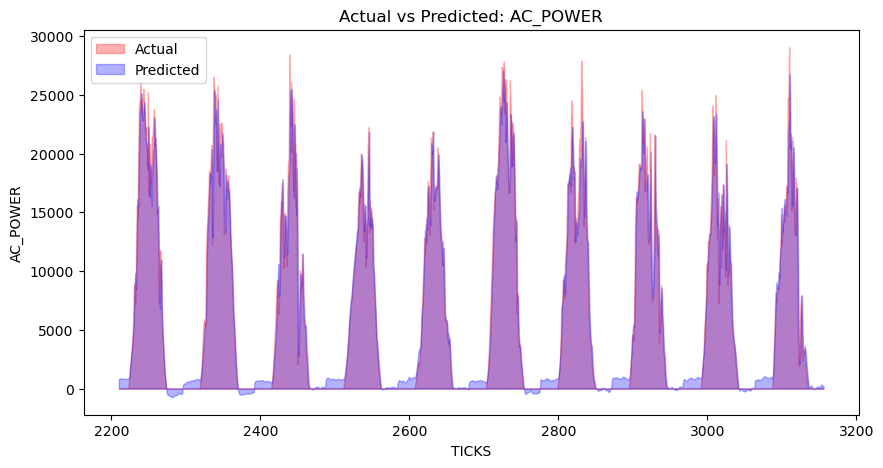

Целевая переменная: DAILY_YIELD
MAE: 2064.640492689426
R²: 0.36286199334732305
----------------------------------------


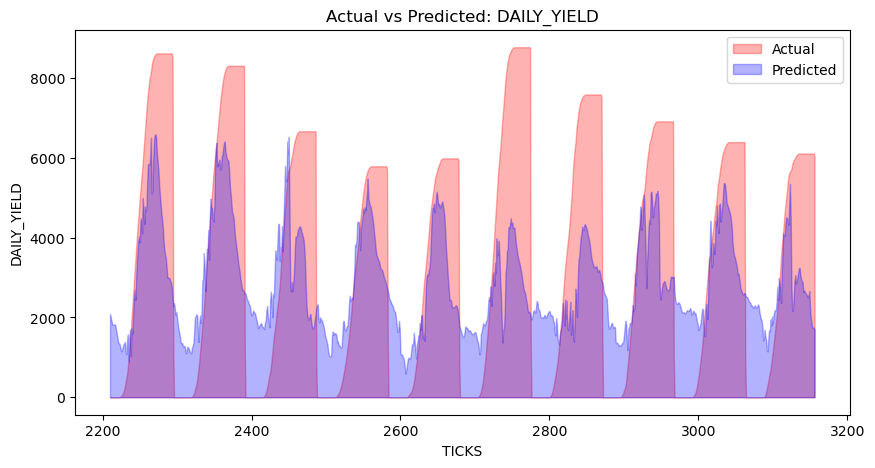

Целевая переменная: MODULE_TEMPERATURE
MAE: 1.3406646858464608
R²: 0.9593613141509341
----------------------------------------


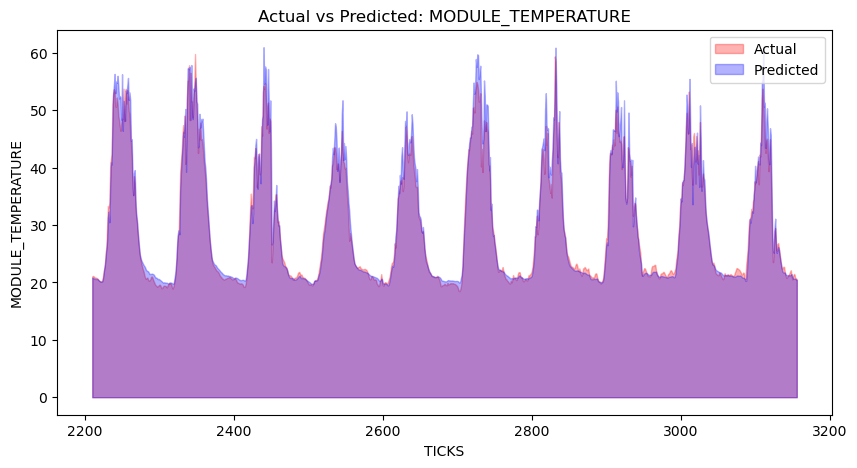

In [141]:
# Группируем данные по TICKS
plant_grouped = plant_1.groupby('TICKS').agg({
    'AC_POWER': 'sum',
    'DC_POWER': 'sum',
    'DAILY_YIELD': 'max',  # Суммируем, так как у каждой панели свой вклад
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean',
    'IRRADIATION': 'mean'
}).reset_index()

# Создаем лаги
lag_features = ['AC_POWER', 'DC_POWER', 'DAILY_YIELD', 
                'AMBIENT_TEMPERATURE', 
                'MODULE_TEMPERATURE', 'IRRADIATION']

# Перебираем каждую переменную в качестве целевой (y)
for target in lag_features:
    lag_features.remove(target)
        
    for feature in lag_features:
        for lag in range(1, 4):
            plant_grouped[f'{feature}_lag{lag}'] = plant_grouped[feature].shift(lag)

    # Удаляем NaN после создания лагов
    plant_final = plant_grouped.dropna()

    # Разделяем выборку
    train_size = int(len(plant_final) * 0.7)
    X = plant_final[[f'{feat}_lag1' for feat in lag_features]]
    y = plant_final[target]

    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Обучаем модель
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Делаем предсказание
    y_pred = model.predict(X_test)

    # Оценка качества модели
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Целевая переменная: {target}')
    print(f'MAE: {mae}')
    print(f'R²: {r2}')
    print('-' * 40)

    # Строим график
    plt.figure(figsize=(10, 5))
    plt.fill_between(y_test.index, y_test, color='red', alpha=0.3, label='Actual')
    plt.fill_between(y_test.index, y_pred, color='blue', alpha=0.3, label='Predicted')

    plt.title(f'Actual vs Predicted: {target}')
    plt.xlabel('TICKS')
    plt.ylabel(target)
    plt.legend()
    plt.show()


In [142]:
# Устанавливаем значение DAILY_YIELD равным 0, если оно меньше 0
plant_2['DAILY_YIELD'] = plant_2['DAILY_YIELD'].apply(lambda x: max(x, 0))


Целевая переменная: AC_POWER
MAE: 1261.0250134403816
R²: 0.8670591732920874
----------------------------------------


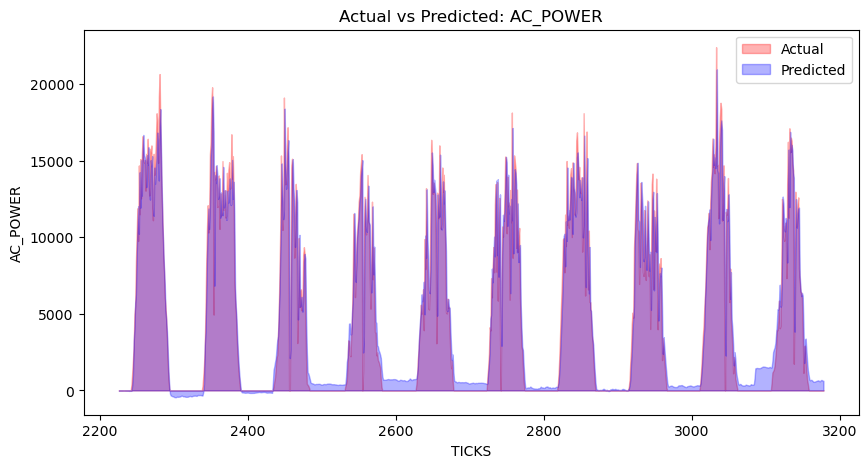

Целевая переменная: DAILY_YIELD
MAE: 1827.1845793138782
R²: 0.24354653254899572
----------------------------------------


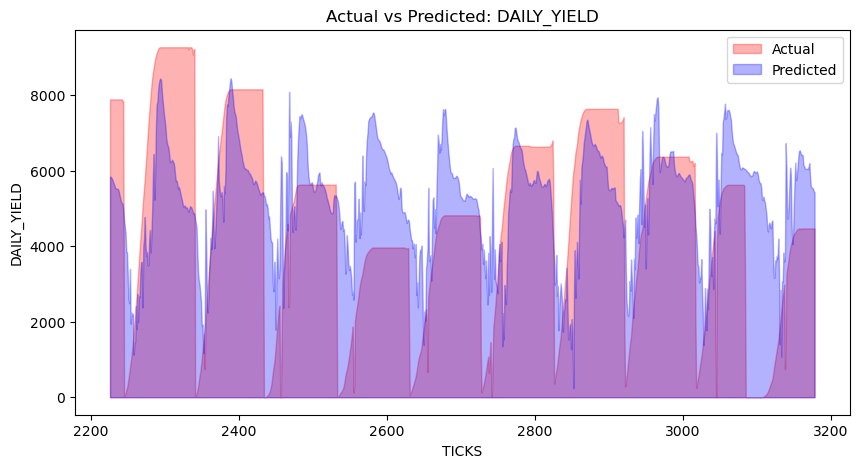

Целевая переменная: MODULE_TEMPERATURE
MAE: 1.219126132574315
R²: 0.9667059232726011
----------------------------------------


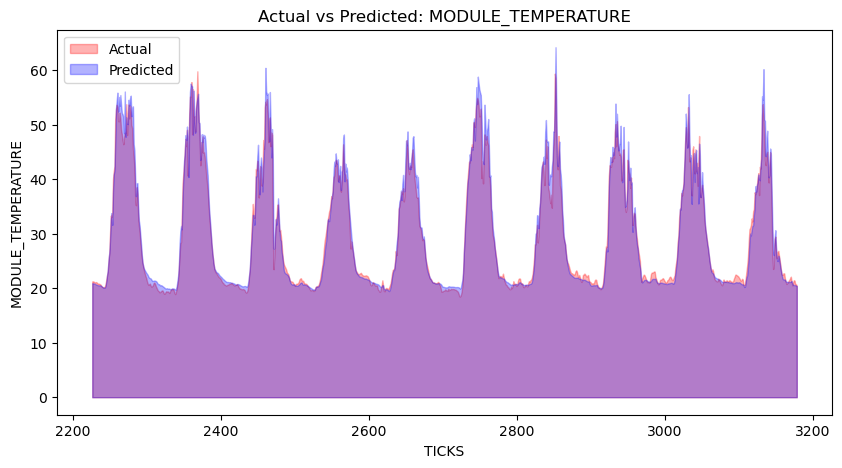

In [143]:
# Группируем данные по TICKS
plant_grouped = plant_2.groupby('TICKS').agg({
    'AC_POWER': 'sum',
    'DC_POWER': 'sum',
    'DAILY_YIELD': 'max',  # Суммируем, так как у каждой панели свой вклад
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean',
    'IRRADIATION': 'mean'
}).reset_index()

# Создаем лаги
lag_features = ['AC_POWER', 'DC_POWER', 'DAILY_YIELD', 
                'AMBIENT_TEMPERATURE', 
                'MODULE_TEMPERATURE', 'IRRADIATION']

# Перебираем каждую переменную в качестве целевой (y)
for target in lag_features:
    lag_features.remove(target)
        
    for feature in lag_features:
        for lag in range(1, 4):
            plant_grouped[f'{feature}_lag{lag}'] = plant_grouped[feature].shift(lag)

    # Удаляем NaN после создания лагов
    plant_final = plant_grouped.dropna()

    # Разделяем выборку
    train_size = int(len(plant_final) * 0.7)
    X = plant_final[[f'{feat}_lag1' for feat in lag_features]]
    y = plant_final[target]

    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Обучаем модель
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Делаем предсказание
    y_pred = model.predict(X_test)

    # Оценка качества модели
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Целевая переменная: {target}')
    print(f'MAE: {mae}')
    print(f'R²: {r2}')
    print('-' * 40)

    # Строим график
    plt.figure(figsize=(10, 5))
    plt.fill_between(y_test.index, y_test, color='red', alpha=0.3, label='Actual')
    plt.fill_between(y_test.index, y_pred, color='blue', alpha=0.3, label='Predicted')

    plt.title(f'Actual vs Predicted: {target}')
    plt.xlabel('TICKS')
    plt.ylabel(target)
    plt.legend()
    plt.show()


### Перейдем к улучшению результатов

Размер обучающей выборки: (2225, 5)
Размер тестовой выборки: (954, 5)
MAE: 1837.170
R²: 0.099
RMSE: 2541.342
MSLE: 3.126


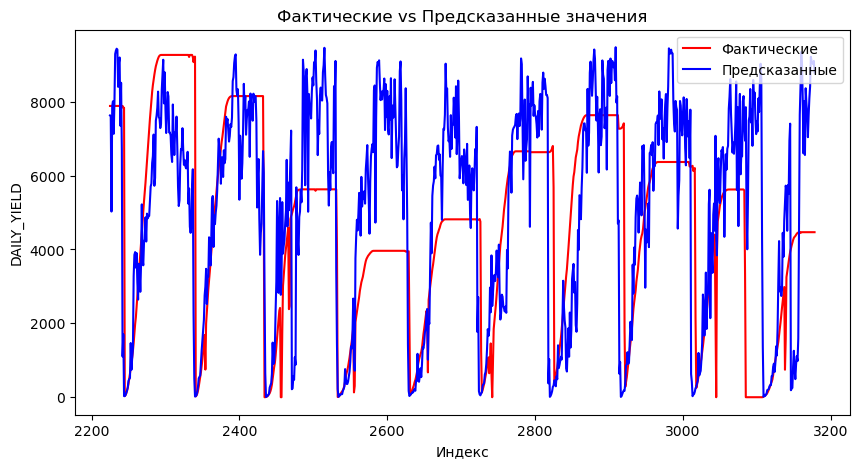

In [144]:
# Группируем данные по TICKS
plant_grouped = plant_2.groupby('TICKS').agg({
    'AC_POWER': 'sum',
    'DC_POWER': 'sum',
    'DAILY_YIELD': 'max',  # Суммируем, так как у каждой панели свой вклад
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean',
    'IRRADIATION': 'mean'
}).reset_index()

# Признаки и целевая переменная
features = ['AC_POWER', 'DC_POWER', 'DAILY_YIELD', 
            'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
target = 'DAILY_YIELD'  # целевая переменная

# Удаляем целевую переменную из списка признаков, если она там есть
if target in features:
    features.remove(target)
    
# Формируем X и y
X = plant_grouped[features]
y = plant_grouped[target]

# Разделяем данные на обучающую (70%) и тестовую (30%) выборки.
# Для временных рядов часто не перемешивают данные (shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)

# Делаем предсказание для тестовой выборки
y_pred = model.predict(X_test)
y_test = np.maximum(y_test, 0)
y_pred = np.maximum(y_pred, 0)


# Оцениваем модель
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# RMSE (Корень средней квадратичной ошибки)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MSLE (Средняя квадратная логарифмическая ошибка)
msle = np.mean(np.square(np.log1p(y_test) - np.log1p(y_pred)))


# Выводим результаты
print(f'MAE: {mae:.3f}')
print(f'R²: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MSLE: {msle:.3f}')

# Строим график для сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Фактические', color='red')
plt.plot(y_test.index, y_pred, label='Предсказанные', color='blue')
plt.title('Фактические vs Предсказанные значения')
plt.xlabel('Индекс')
plt.ylabel(target)
plt.legend()
plt.show()


MAE: 1633.159
R²: 0.344
RMSE: 2167.645
MSLE: 3.289


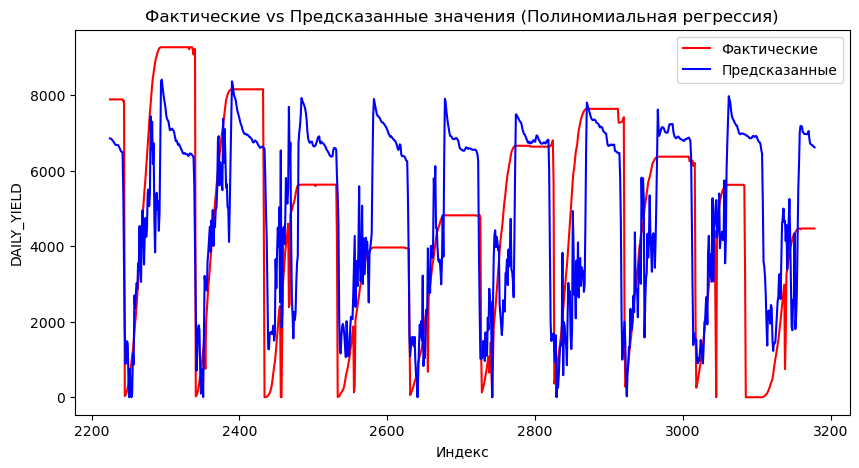

In [145]:
# Группируем данные по TICKS
plant_grouped = plant_2.groupby('TICKS').agg({
    'AC_POWER': 'sum',
    'DC_POWER': 'sum',
    'DAILY_YIELD': 'max',
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean',
    'IRRADIATION': 'mean'
}).reset_index()

# Признаки и целевая переменная
features = ['AC_POWER', 'DC_POWER', 'DAILY_YIELD', 
            'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
target = 'DAILY_YIELD'  # Целевая переменная

# Удаляем целевую переменную из списка признаков, если она там есть
if target in features:
    features.remove(target)

# Формируем X и y
X = plant_grouped[features]
y = plant_grouped[target]

# Разделяем данные на обучающую (70%) и тестовую (30%) выборки.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=42)

# Добавляем полиномиальные признаки (например, степени 2)
poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Делаем предсказания
y_pred = model.predict(X_test_poly)

# Убираем отрицательные предсказания
y_test = np.maximum(y_test, 0)
y_pred = np.maximum(y_pred, 0)

# Оцениваем модель
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
msle = np.mean(np.square(np.log1p(y_test) - np.log1p(y_pred)))

# Выводим результаты
print(f'MAE: {mae:.3f}')
print(f'R²: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MSLE: {msle:.3f}')

# Строим график для сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Фактические', color='red')
plt.plot(y_test.index, y_pred, label='Предсказанные', color='blue')
plt.title('Фактические vs Предсказанные значения (Полиномиальная регрессия)')
plt.xlabel('Индекс')
plt.ylabel(target)
plt.legend()
plt.show()


In [146]:
# Группируем данные по TICKS
plant_grouped = plant_2.groupby('TICKS').agg({
    'AC_POWER': 'sum',
    'DC_POWER': 'sum',
    'DAILY_YIELD': 'max',  # Суммируем, так как у каждой панели свой вклад
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean',
    'IRRADIATION': 'mean'
}).reset_index()

# Признаки и целевая переменная
features = ['AC_POWER', 'DC_POWER', 'DAILY_YIELD', 
            'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
target = 'DAILY_YIELD'  # целевая переменная

# Удаляем целевую переменную из списка признаков, если она там есть
if target in features:
    features.remove(target)
    
# Формируем X и y
X = plant_grouped[features]
y = plant_grouped[target]

# Разделяем данные на обучающую (70%) и тестовую (30%) выборки.
# Для временных рядов часто не перемешивают данные (shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)
print("-"*40)
print("LinearRegression")
model = LinearRegression()
model.fit(X_train, y_train)

# Делаем предсказание для тестовой выборки
y_pred = model.predict(X_test)
y_test = np.maximum(y_test, 0)
y_pred = np.maximum(y_pred, 0)


# Оцениваем модель
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# RMSE (Корень средней квадратичной ошибки)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MSLE (Средняя квадратная логарифмическая ошибка)
msle = np.mean(np.square(np.log1p(y_test) - np.log1p(y_pred)))


# Выводим результаты
print(f'MAE: {mae:.3f}')
print(f'R²: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MSLE: {msle:.3f}')
print("-"*40)
print("Polynomial")

poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Делаем предсказания
y_pred = model.predict(X_test_poly)

# Убираем отрицательные предсказания
y_test = np.maximum(y_test, 0)
y_pred = np.maximum(y_pred, 0)

# Оцениваем модель
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
msle = np.mean(np.square(np.log1p(y_test) - np.log1p(y_pred)))
# Выводим результаты
print(f'MAE: {mae:.3f}')
print(f'R²: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MSLE: {msle:.3f}')
print("-"*40)
print("RandomForest")
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)

# Делаем предсказание для тестовой выборки
y_pred = model.predict(X_test)
y_test = np.maximum(y_test, 0)
y_pred = np.maximum(y_pred, 0)


# Оцениваем модель
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# RMSE (Корень средней квадратичной ошибки)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MSLE (Средняя квадратная логарифмическая ошибка)
msle = np.mean(np.square(np.log1p(y_test) - np.log1p(y_pred)))

print(f'MAE: {mae:.3f}')
print(f'R²: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MSLE: {msle:.3f}')
print("-"*40)
print("XGB")

model = XGBRegressor(n_estimators=1000)
model.fit(X_train, y_train)

# Делаем предсказание для тестовой выборки
y_pred = model.predict(X_test)
y_test = np.maximum(y_test, 0)
y_pred = np.maximum(y_pred, 0)


# Оцениваем модель
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# RMSE (Корень средней квадратичной ошибки)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MSLE (Средняя квадратная логарифмическая ошибка)
msle = np.mean(np.square(np.log1p(y_test) - np.log1p(y_pred)))
print(f'MAE: {mae:.3f}')
print(f'R²: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MSLE: {msle:.3f}')
print("-"*40)

Размер обучающей выборки: (2225, 5)
Размер тестовой выборки: (954, 5)
----------------------------------------
LinearRegression
MAE: 1725.169
R²: 0.288
RMSE: 2259.609
MSLE: 3.491
----------------------------------------
Polynomial
MAE: 1633.159
R²: 0.344
RMSE: 2167.645
MSLE: 3.289
----------------------------------------
RandomForest
MAE: 1834.667
R²: 0.099
RMSE: 2541.722
MSLE: 3.148
----------------------------------------
XGB
MAE: 1977.045
R²: 0.005
RMSE: 2670.774
MSLE: 4.408
----------------------------------------


### Максимум чего можно добится с полиномом

# 6.Выберите и обоснуйте метрики для ее оценки. Покажите, как модель работает на данных, которые не видела при обучении.

### В качестве основных метрик были выбраны MAE, R2, RMSE, MSLE так как они дают интерпретируемость результатов и регулирование крупной ошибки. Больше всего буду отталкиваться от MSLE так как она хорошо характеризует данные с высокой изменчивостью

In [147]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestRegressor()

# Применяем GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Выводим лучшие параметры
print("Лучшие параметры для RandomForestRegressor:", grid_search.best_params_)

# Обучаем модель с лучшими параметрами
best_model = grid_search.best_estimator_

# Оцениваем модель
y_pred = best_model.predict(X_test)
y_pred = np.maximum(y_pred, 0)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
msle = np.mean(np.square(np.log1p(y_test) - np.log1p(y_pred)))

print(f'MAE: {mae:.3f}')
print(f'R²: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MSLE: {msle:.3f}')


Лучшие параметры для RandomForestRegressor: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
MAE: 1809.488
R²: 0.122
RMSE: 2508.337
MSLE: 3.150


In [149]:

param_grid = {
    'n_estimators': [500, 1000, 2000],
    'learning_rate': [0.01, 0.05, 0.03],
    'max_depth': [1,2,3],
    'subsample': [0.93, 0.96, 1],
    'colsample_bytree': [0.93, 0.97, 1.0]
}

model = XGBRegressor()

# Применяем GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Выводим лучшие параметры
print("Лучшие параметры для XGBRegressor:", grid_search.best_params_)

# Обучаем модель с лучшими параметрами
best_model = grid_search.best_estimator_

# Оцениваем модель
y_pred = best_model.predict(X_test)
y_pred = np.maximum(y_pred, 0)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
msle = np.mean(np.square(np.log1p(y_test) - np.log1p(y_pred)))

print(f'MAE: {mae:.3f}')
print(f'R²: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MSLE: {msle:.3f}')


Лучшие параметры для XGBRegressor: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1}
MAE: 1674.333
R²: 0.259
RMSE: 2304.785
MSLE: 2.937


### Я рассмотрел базовые модели, возможно рассмотреть и более сложные. Удалось выполнить качественный анализ данных с целью наилучшего понимания и применения полученных материалов. Я многое узнал из анализа данного датасета.

# 7.Представьте, что решаете реальную бизнес-задачу. Как вы могли бы использовать вашу модель? Какие бизнес-метрики могли бы быть использованы для ее контроля?

### Моя модель хорошо позволяет определять AC_POWER И MODULE_TEMPRETURE, что позволяет понимать какие нагрузки в будующем будет испытывать солнечная батарея, параметр  DC_POWER является сложно определимым для моей модели, это связанно с качеством изначального датасета с плантации 2.
### Также визуализация позволяет наглядно увидеть в какой момент времени данные о панелях не поступали.
### Что касается параметра DAILY_YIELD он является определимым, но шанс верного результата там отнють не равен 100%
### Все мои лучшие попытки с базовыми моделями представлены выше
### Бизнес метрики которыемогут быть использованы для оценки моей модели
- Снижение затрат на обслуживание
- Уменьшение закупок энергии извне (штрафы на прогнозы)
- КПД солнечной установки


### Во всей работе исопользовался LLM, многие коменты я не удалял, оставил как есть. Идея была в том чтобы как можно подробнее расмотреть предоставленные данные с теоретической точки зрения. Сам датасет по размеру небольшой. Ну и ссылки на чаты с GPT:

https://chatgpt.com/share/67d49eef-3f20-8013-9095-1945d473c17e

https://chatgpt.com/share/67d49f44-9f04-8013-8f7f-05cb2272dc73

https://chatgpt.com/share/67d42005-6a08-8013-a66c-09ceeef39dbe

https://chatgpt.com/share/67d49f85-6c84-8013-b59a-924a3c0bcc11

https://chatgpt.com/share/67d49f9a-29e8-8013-ba31-a38b39ebf854

https://chatgpt.com/share/67d49fad-87a4-8013-a1de-97ec76945a90

https://chatgpt.com/share/67d49fc6-0274-8013-8818-22eace197383

https://chatgpt.com/share/67d49fd4-3b08-8013-80d1-a89746c4fda8

### Сюда вошли только продуктивные чаты которые были полезны, а так чатов было 24 только за сегодня

### P.S Многое из того что было придуманно и было готово не вошло в итоговый материал, по причине ненадобности, ошибочности, невнемательности и тд и тп.